In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(data.table))


In [2]:
inter_dir <- "/ysm-gpfs/pi/zhao/zy92/projects/utmost_update/GTEX/adjusted_expr"
inter_files <- list.files("/ysm-gpfs/pi/zhao/zy92/projects/utmost_update/GTEX/adjusted_expr/")
head(inter_files)

character(0)

In [3]:
list.files("/ysm-gpfs/pi/zhao/zy92/projects/utmost_update//GTEX/")

[1] "adjusted_expr"                "expression_list_target.RData"
[3] "gene_info_target.RData"       "gene_info.RData"             
[5] "protein_coding.RData"         "proteingene_list.RData"

In [4]:
head(("/ysm-gpfs/pi/zhao/zy92/projects/utmost_update/"))

[1] "/ysm-gpfs/pi/zhao/zy92/projects/utmost_update/"

In [5]:
ln1 <- load("/ysm-gpfs/pi/zhao/zy92/projects/utmost_update//GTEX/gene_info_target.RData")
ln1

[1] "gene_info_target"

In [6]:
dim(gene_info_target)

[1] 27208     4

In [7]:
ln2 <- load("/ysm-gpfs/pi/zhao/zy92/projects/utmost_update/tissue_idx.RData")
ln2 

[1] "sample_count" "idx_list"

In [8]:
head(names(idx_list))
head(idx_list[['Whole Blood']])

[1] "Whole Blood"                  "Brain - Frontal Cortex (BA9)"
[3] "Adipose - Subcutaneous"       "Muscle - Skeletal"           
[5] "Artery - Tibial"              "Artery - Coronary"

[1] "GTEX-1117F-0003-SM-58Q7G" "GTEX-1117F-0003-SM-5DWSB"
[3] "GTEX-1117F-0003-SM-6WBT7" "GTEX-111CU-0003-SM-58Q95"
[5] "GTEX-111CU-0003-SM-5DWTR" "GTEX-111CU-0003-SM-6WBUD"

In [9]:
# collect the data 
expression_df <- fread("/ysm-gpfs/pi/zhao-data/zy92/GTEx_V8/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct")
dim(expression_df)

[1] 56200 17384

In [10]:
head(colnames(expression_df))

[1] "Name"                     "Description"             
[3] "GTEX-1117F-0226-SM-5GZZ7" "GTEX-1117F-0426-SM-5EGHI"
[5] "GTEX-1117F-0526-SM-5EGHJ" "GTEX-1117F-0626-SM-5N9CS"

In [11]:
#target_idx <- idx_list[['Whole Blood']] %in% colnames(expression_df)
# length(target_idx)
# sum(target_idx)
# head(target_idx)

In [12]:
dim(expression_df)
length(colnames(expression_df))

[1] 56200 17384

[1] 17384

In [13]:
head(idx_list[['Whole Blood']])

[1] "GTEX-1117F-0003-SM-58Q7G" "GTEX-1117F-0003-SM-5DWSB"
[3] "GTEX-1117F-0003-SM-6WBT7" "GTEX-111CU-0003-SM-58Q95"
[5] "GTEX-111CU-0003-SM-5DWTR" "GTEX-111CU-0003-SM-6WBUD"

In [14]:
length(idx_list[['Whole Blood']])
length(unique(idx_list[['Whole Blood']]))



[1] 3288

[1] 3288

In [15]:
tissue <- "Whole Blood"
header <- colnames(expression_df)
target_idx <- match(idx_list[[tissue]], header)
target_idx_col <- which(!is.na(target_idx))
#target_idx <- target_idx[which(target_idx == T)]
#expression_list[[tissue]] <- expression_df[, c(1,2,target_idx)]

In [16]:
head(target_idx_col)

[1] 16 20 24 28 32 36

In [17]:
head(idx_list[[tissue]])

[1] "GTEX-1117F-0003-SM-58Q7G" "GTEX-1117F-0003-SM-5DWSB"
[3] "GTEX-1117F-0003-SM-6WBT7" "GTEX-111CU-0003-SM-58Q95"
[5] "GTEX-111CU-0003-SM-5DWTR" "GTEX-111CU-0003-SM-6WBUD"

In [18]:
head(header)

[1] "Name"                     "Description"             
[3] "GTEX-1117F-0226-SM-5GZZ7" "GTEX-1117F-0426-SM-5EGHI"
[5] "GTEX-1117F-0526-SM-5EGHJ" "GTEX-1117F-0626-SM-5N9CS"

In [19]:
head(target_idx)

[1] NA NA NA NA NA NA

In [20]:
length(target_idx)

[1] 3288

In [21]:
expression_df <- as.data.frame(expression_df)
expression_df$NameClean <- as.character(sapply(expression_df$Name, function(x) unlist(strsplit(x, "\\."))[[1]]))

In [22]:
# extract the tissue-specific expression profile based on the tissue idx
tissue_vec <- names(idx_list)
expression_list <- list()
header <- colnames(expression_df)
for (tissue in tissue_vec) {
    target_idx <- header %in% idx_list[[tissue]] 
    #target_idx <- target_idx[which(target_idx == T)]
    expression_list[[tissue]] <- expression_df[, target_idx]
    expression_list[[tissue]]$Name <- expression_df$Name
    expression_list[[tissue]]$Description <- expression_df$Description
}

In [23]:
head(header)

[1] "Name"                     "Description"             
[3] "GTEX-1117F-0226-SM-5GZZ7" "GTEX-1117F-0426-SM-5EGHI"
[5] "GTEX-1117F-0526-SM-5EGHJ" "GTEX-1117F-0626-SM-5N9CS"

In [24]:
getwd()

[1] "/gpfs/ysm/project/zhao/zy92/utmost_update/code/R"

In [25]:
# /home/fas/radev/zy92/project/utmost_update/GTEX
#save(expression_list, expression_df, file = "/ysm-gpfs/pi/zhao/zy92/projects/utmost_update/GTEX/expression_list_target.RData")
#save(expression_list, expression_df, file = "/gpfs/loomis/project/radev/zy92/utmost_update/GTEX/expression_list_target.RData")

In [26]:
dim(expression_list[['Whole Blood']])

[1] 56200   757

In [27]:
ln3 <- load("/ysm-gpfs/pi/zhao/zy92/projects/utmost_update/GTEX/gene_info_target.RData")
ln3

[1] "gene_info_target"

In [28]:
class(gene_info_target)

[1] "data.frame"

In [30]:
expression_df_target <- expression_df %>% 
    filter(Name %in% UQ(gene_info_target$ensembl_gene_id))

In [31]:
head(gene_info_target$ensembl_gene_id)

[1] "ENSG00000228229" "ENSG00000237445" "ENSG00000231606" "ENSG00000234593"
[5] "ENSG00000228140" "ENSG00000186092"

In [32]:
dim(expression_df)

[1] 56200 17385

In [33]:
class(expression_df)

[1] "data.frame"

In [34]:
head(expression_df[,1:6])

Name,Description,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000223972.5,DDX11L1,0.00000,0.000,0.000,0.00000
ENSG00000227232.5,WASH7P,8.76400,3.861,7.349,11.07000
ENSG00000278267.1,MIR6859-1,0.00000,0.000,1.004,0.00000
ENSG00000243485.5,MIR1302-2HG,0.07187,0.000,0.000,0.06761
ENSG00000237613.2,FAM138A,0.00000,0.000,0.000,0.00000
ENSG00000268020.3,OR4G4P,0.00000,0.056,0.000,0.00000


In [35]:
#gene_info_target$ensembl_gene_id

In [36]:
expression_df$NameClean <- as.character(sapply(expression_df$Name, function(x) unlist(strsplit(x, "\\."))[[1]]))

In [37]:
unlist(strsplit(expression_df$Name[1], "\\."))[[1]]

[1] "ENSG00000223972"

In [38]:
dim(expression_df_target)

[1]     0 17385

In [39]:
class(expression_df)

[1] "data.frame"

In [40]:
head(colnames(expression_df))

[1] "Name"                     "Description"             
[3] "GTEX-1117F-0226-SM-5GZZ7" "GTEX-1117F-0426-SM-5EGHI"
[5] "GTEX-1117F-0526-SM-5EGHJ" "GTEX-1117F-0626-SM-5N9CS"

In [42]:
#gene_vec[startsWith(gene_vec, "DICER")]
dicer_expression <- expression_df %>% filter(Description == "DICER1")


In [43]:
table(gene_info_target$transcript_biotype)


       lincRNA          miRNA protein_coding 
          6724           1215          19269 

In [44]:
mirna_info <- gene_info_target %>% filter(transcript_biotype == "miRNA")

In [45]:
colnames(mirna_info)

[1] "ensembl_gene_id"    "hgnc_symbol"        "chromosome_name"   
[4] "transcript_biotype"

In [46]:
head(colnames(expression_df))

[1] "Name"                     "Description"             
[3] "GTEX-1117F-0226-SM-5GZZ7" "GTEX-1117F-0426-SM-5EGHI"
[5] "GTEX-1117F-0526-SM-5EGHJ" "GTEX-1117F-0626-SM-5N9CS"

In [47]:
head(expression_df$NameClean)

[1] "ENSG00000223972" "ENSG00000227232" "ENSG00000278267" "ENSG00000243485"
[5] "ENSG00000237613" "ENSG00000268020"

In [48]:
head(mirna_info)

ensembl_gene_id,hgnc_symbol,chromosome_name,transcript_biotype
<chr>,<chr>,<chr>,<chr>
ENSG00000243485,MIR1302-11,1,miRNA
ENSG00000243485,MIR1302-10,1,miRNA
ENSG00000243485,MIR1302-9,1,miRNA
ENSG00000243485,MIR1302-2,1,miRNA
ENSG00000207730,MIR200B,1,miRNA
ENSG00000207607,MIR200A,1,miRNA


In [49]:
mirna_expression <- mirna_info %>%
    left_join(expression_df, by = c("ensembl_gene_id" = "NameClean")) 

In [50]:
dim(mirna_expression)
dim(dicer_expression)

[1]  1217 17388

[1]     1 17385

In [51]:
dim(mirna_expression)

[1]  1217 17388

In [52]:
dim(dicer_expression)

[1]     1 17385

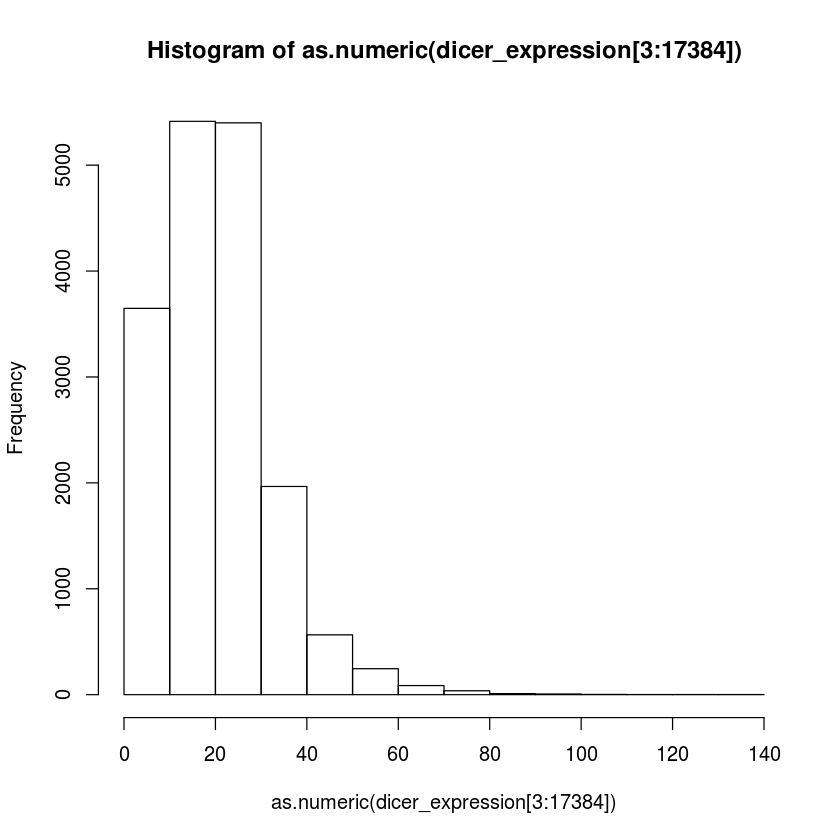

In [53]:
hist(as.numeric(dicer_expression[3:17384]))

In [54]:
dicer_expression_val <- as.numeric(dicer_expression[3:17384])
mirna_expression_val <- as.numeric(mirna_expression[1, 7:17388])

In [64]:
mirna_expression[1:10, 1:10]

ensembl_gene_id,hgnc_symbol,chromosome_name,transcript_biotype,Name,Description,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000243485,MIR1302-11,1,miRNA,ENSG00000243485.5,MIR1302-2HG,0.07187,0.000,0.0000,0.06761
ENSG00000243485,MIR1302-10,1,miRNA,ENSG00000243485.5,MIR1302-2HG,0.07187,0.000,0.0000,0.06761
ENSG00000243485,MIR1302-9,1,miRNA,ENSG00000243485.5,MIR1302-2HG,0.07187,0.000,0.0000,0.06761
ENSG00000243485,MIR1302-2,1,miRNA,ENSG00000243485.5,MIR1302-2HG,0.07187,0.000,0.0000,0.06761
ENSG00000207730,MIR200B,1,miRNA,ENSG00000207730.3,MIR200B,0.65510,0.000,0.0000,0.00000
ENSG00000207607,MIR200A,1,miRNA,ENSG00000207607.3,MIR200A,0.00000,0.000,0.0000,0.00000
ENSG00000198976,MIR429,1,miRNA,ENSG00000198976.1,MIR429,0.00000,1.133,0.8223,0.00000
ENSG00000207776,MIR551A,1,miRNA,ENSG00000207776.1,MIR551A,0.00000,0.000,0.0000,0.00000
ENSG00000264341,MIR4417,1,miRNA,ENSG00000264341.1,MIR4417,0.00000,0.000,0.0000,0.00000


In [66]:
mirna_expression_unique <- mirna_expression %>%
    distinct(ensembl_gene_id, .keep_all = T)

In [67]:
dim(mirna_expression_unique)

[1]  1166 17388

In [68]:
# plotting function
plot_dicer_miRNA <- function(idx) {
    mirna_expression_tpm <- as.numeric(mirna_expression_unique[idx, 7:17388])
    plot(dicer_expression_val, mirna_expression_tpm)
}

cor_dicer_miRNA <- function(idx) {
    mirna_expression_tpm <- as.numeric(mirna_expression_unique[idx, 7:17388])
    return(cor(dicer_expression_val, mirna_expression_tpm))
}

dicer_miRNA <- function(idx) {
    plot_dicer_miRNA(idx)
    cor_dicer_miRNA(idx)
}

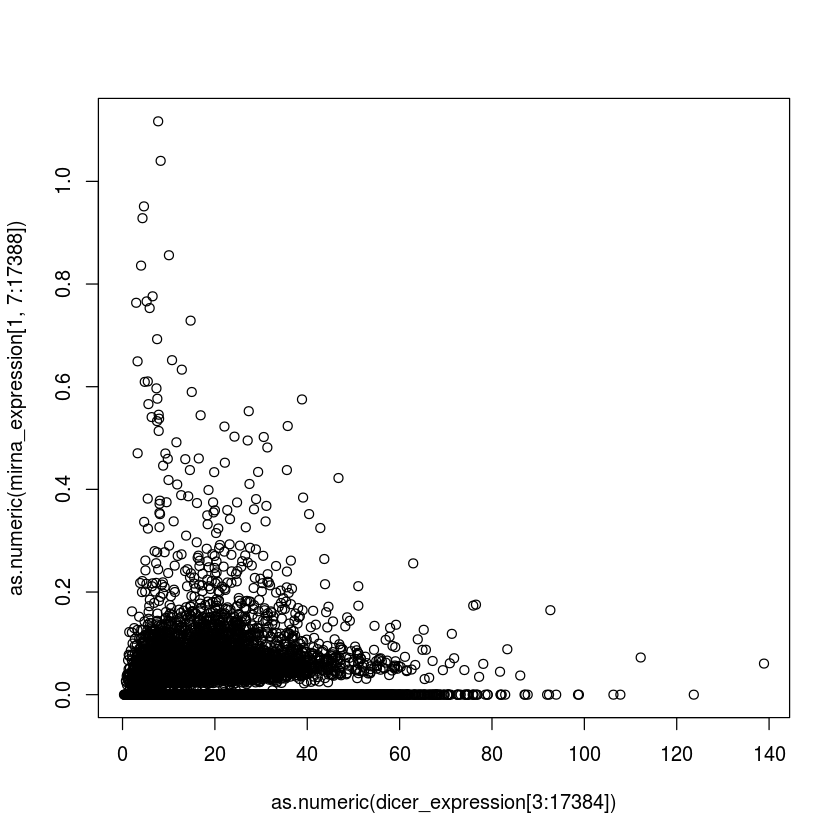

In [56]:
plot(as.numeric(dicer_expression[3:17384]), as.numeric(mirna_expression[1, 7:17388]))

In [57]:
mirna_expression[1:10, 1:10]

ensembl_gene_id,hgnc_symbol,chromosome_name,transcript_biotype,Name,Description,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000243485,MIR1302-11,1,miRNA,ENSG00000243485.5,MIR1302-2HG,0.07187,0.000,0.0000,0.06761
ENSG00000243485,MIR1302-10,1,miRNA,ENSG00000243485.5,MIR1302-2HG,0.07187,0.000,0.0000,0.06761
ENSG00000243485,MIR1302-9,1,miRNA,ENSG00000243485.5,MIR1302-2HG,0.07187,0.000,0.0000,0.06761
ENSG00000243485,MIR1302-2,1,miRNA,ENSG00000243485.5,MIR1302-2HG,0.07187,0.000,0.0000,0.06761
ENSG00000207730,MIR200B,1,miRNA,ENSG00000207730.3,MIR200B,0.65510,0.000,0.0000,0.00000
ENSG00000207607,MIR200A,1,miRNA,ENSG00000207607.3,MIR200A,0.00000,0.000,0.0000,0.00000
ENSG00000198976,MIR429,1,miRNA,ENSG00000198976.1,MIR429,0.00000,1.133,0.8223,0.00000
ENSG00000207776,MIR551A,1,miRNA,ENSG00000207776.1,MIR551A,0.00000,0.000,0.0000,0.00000
ENSG00000264341,MIR4417,1,miRNA,ENSG00000264341.1,MIR4417,0.00000,0.000,0.0000,0.00000


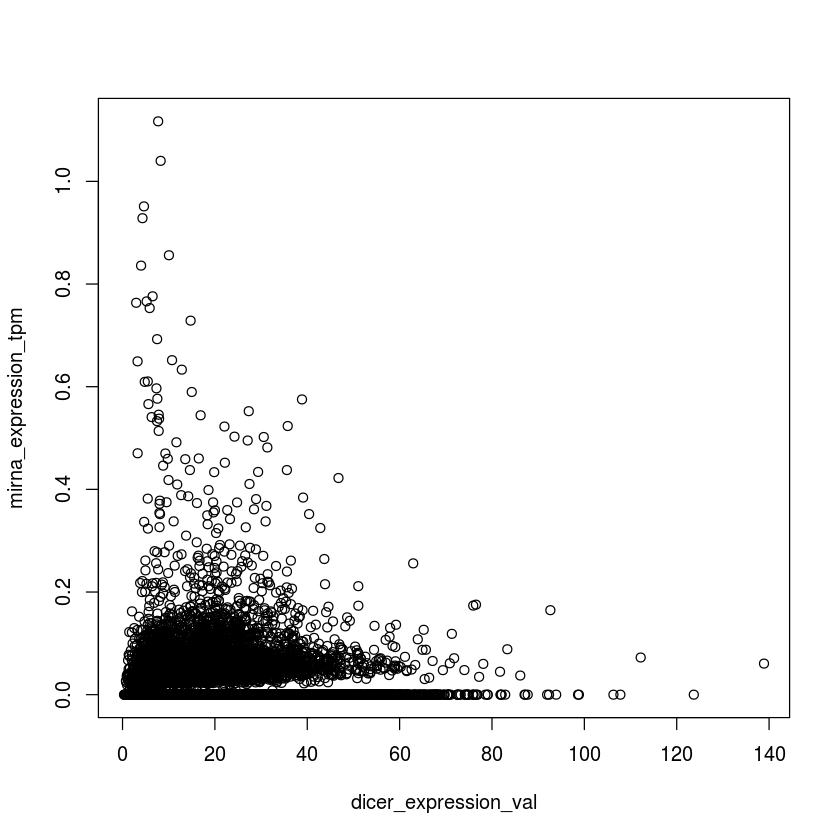

In [58]:
plot_dicer_miRNA(2)

[1] -0.0551383

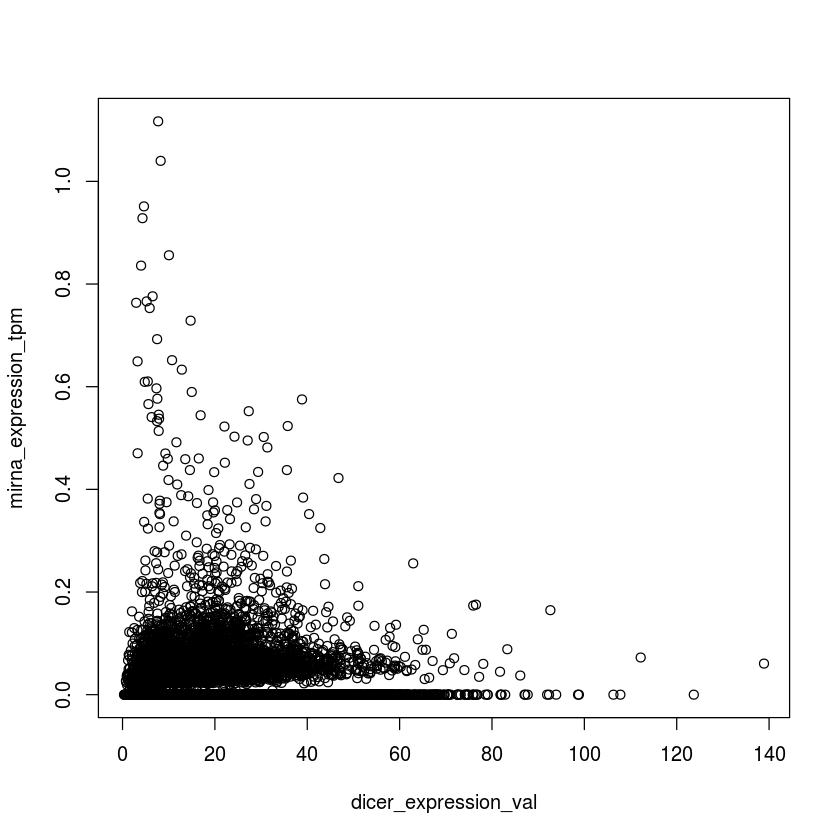

In [62]:
plot_dicer_miRNA(3)
cor_dicer_miRNA(3)

[1] -0.0551383

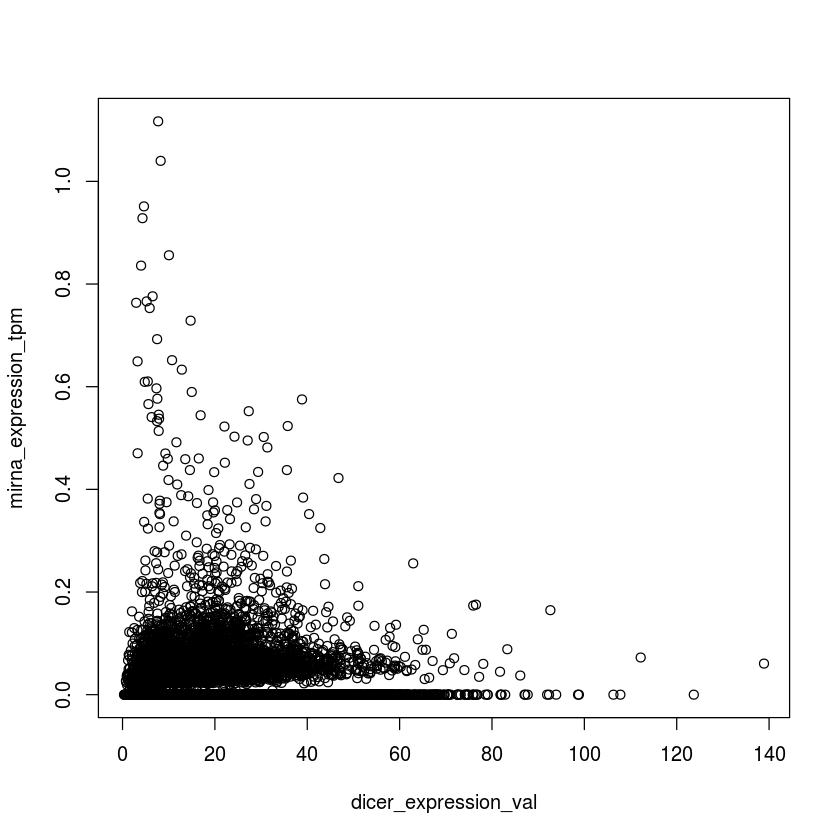

In [60]:
dicer_miRNA(1)

[1] -0.0551383

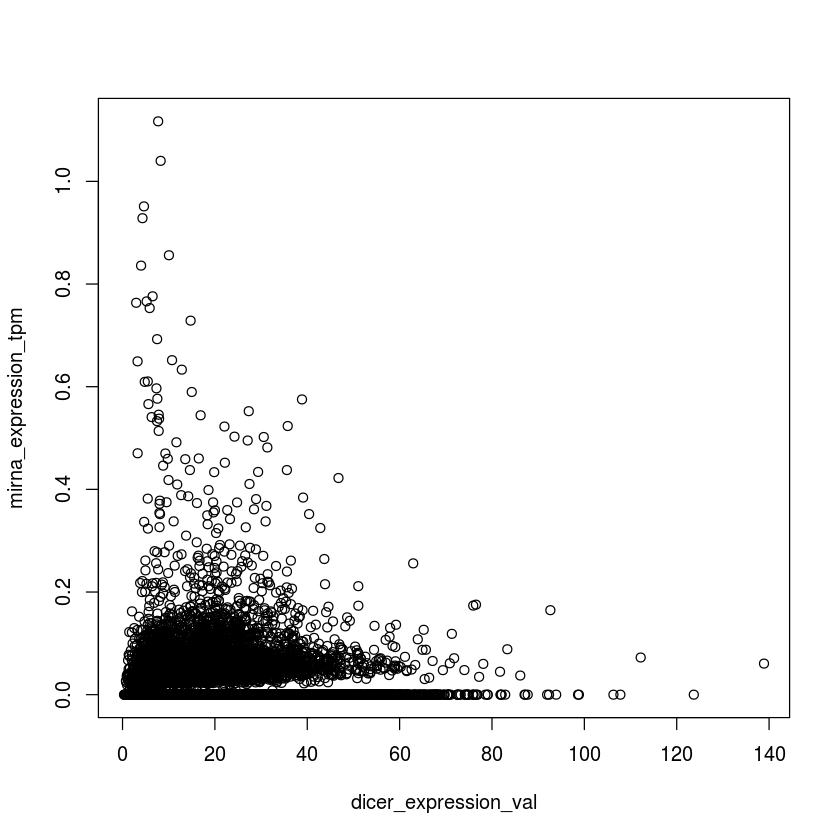

In [61]:
dicer_miRNA(2)

[1] -0.0551383

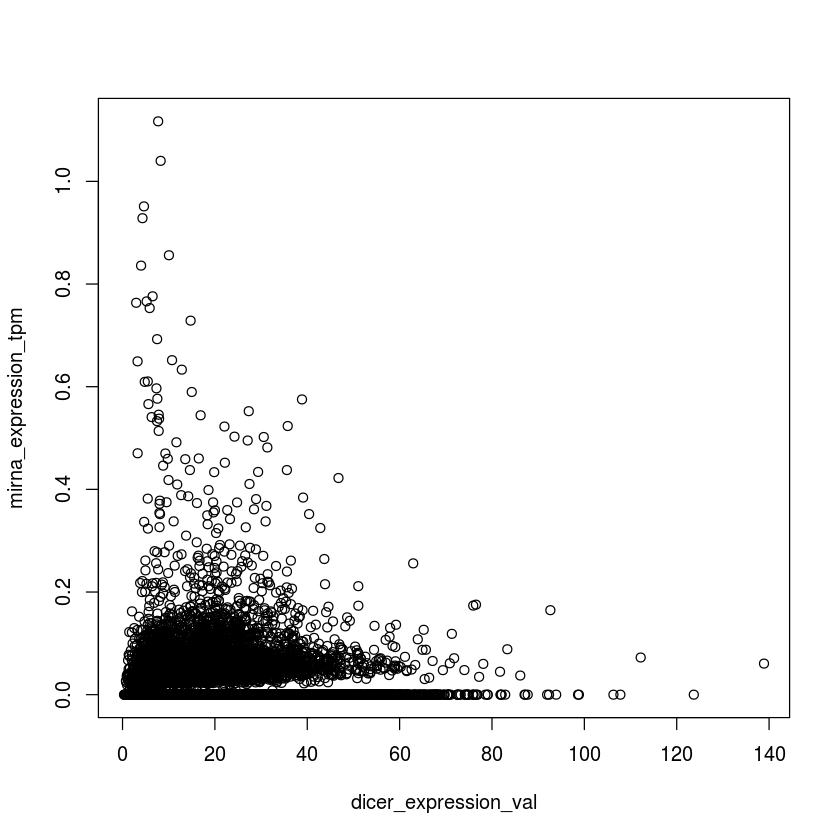

In [69]:
dicer_miRNA(1)

[1] 0.002666696

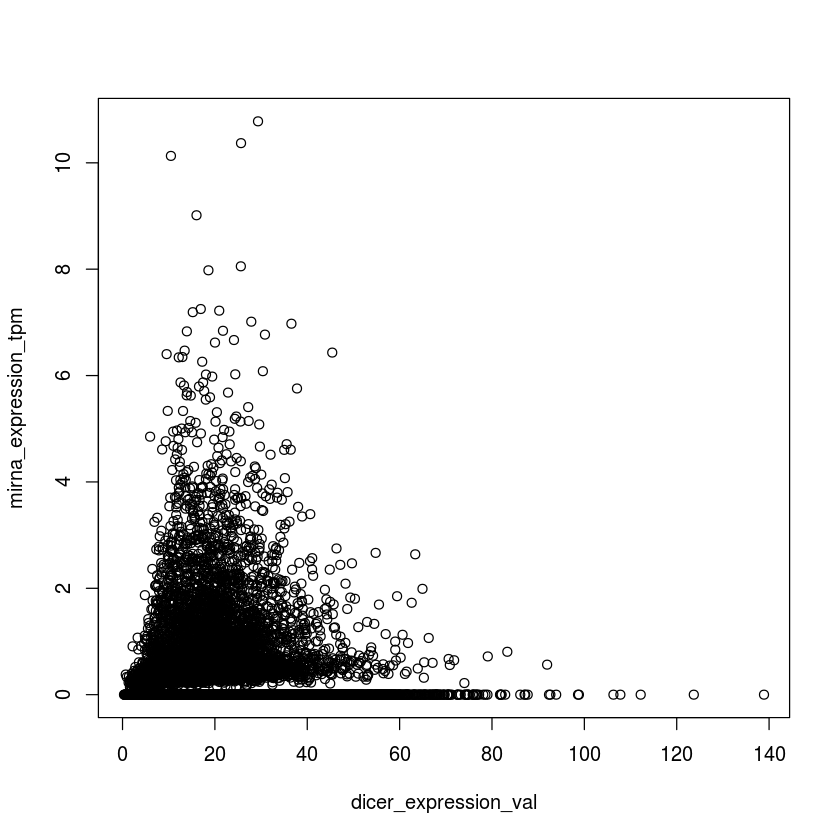

In [70]:
dicer_miRNA(2)

[1] -0.003449527

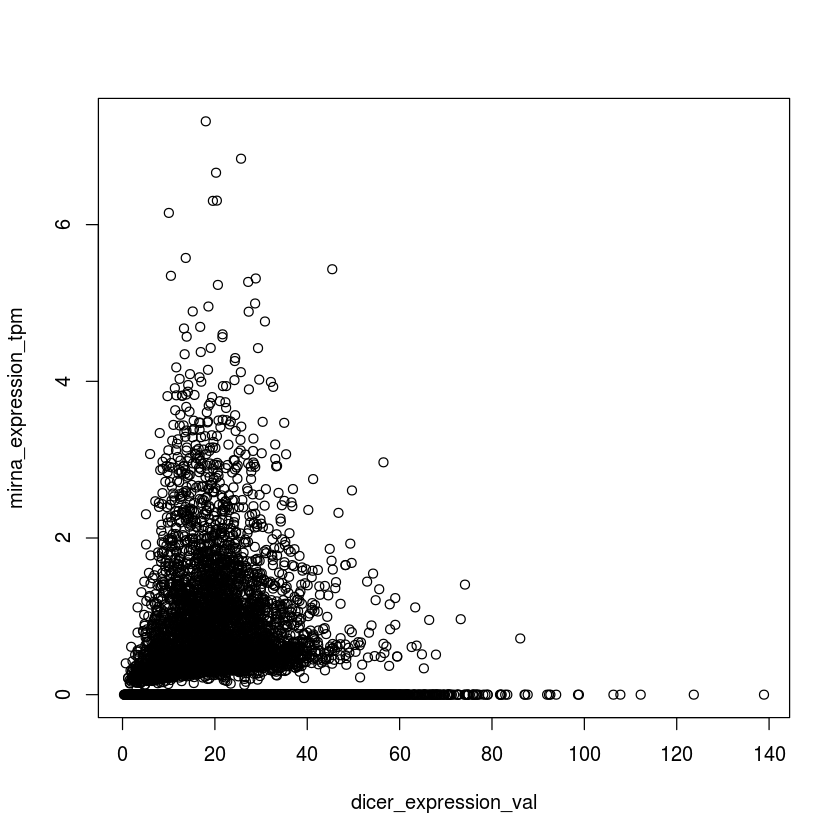

In [71]:
dicer_miRNA(3)

In [72]:
cor_res <- as.numeric(sapply(1:1166, function(x) cor_dicer_miRNA(x)))

Warning message in cor(dicer_expression_val, mirna_expression_tpm):
“the standard deviation is zero”Warning message in cor(dicer_expression_val, mirna_expression_tpm):
“the standard deviation is zero”Warning message in cor(dicer_expression_val, mirna_expression_tpm):
“the standard deviation is zero”Warning message in cor(dicer_expression_val, mirna_expression_tpm):
“the standard deviation is zero”Warning message in cor(dicer_expression_val, mirna_expression_tpm):
“the standard deviation is zero”Warning message in cor(dicer_expression_val, mirna_expression_tpm):
“the standard deviation is zero”Warning message in cor(dicer_expression_val, mirna_expression_tpm):
“the standard deviation is zero”Warning message in cor(dicer_expression_val, mirna_expression_tpm):
“the standard deviation is zero”Warning message in cor(dicer_expression_val, mirna_expression_tpm):
“the standard deviation is zero”Warning message in cor(dicer_expression_val, mirna_expression_tpm):
“the standard deviation is zero”

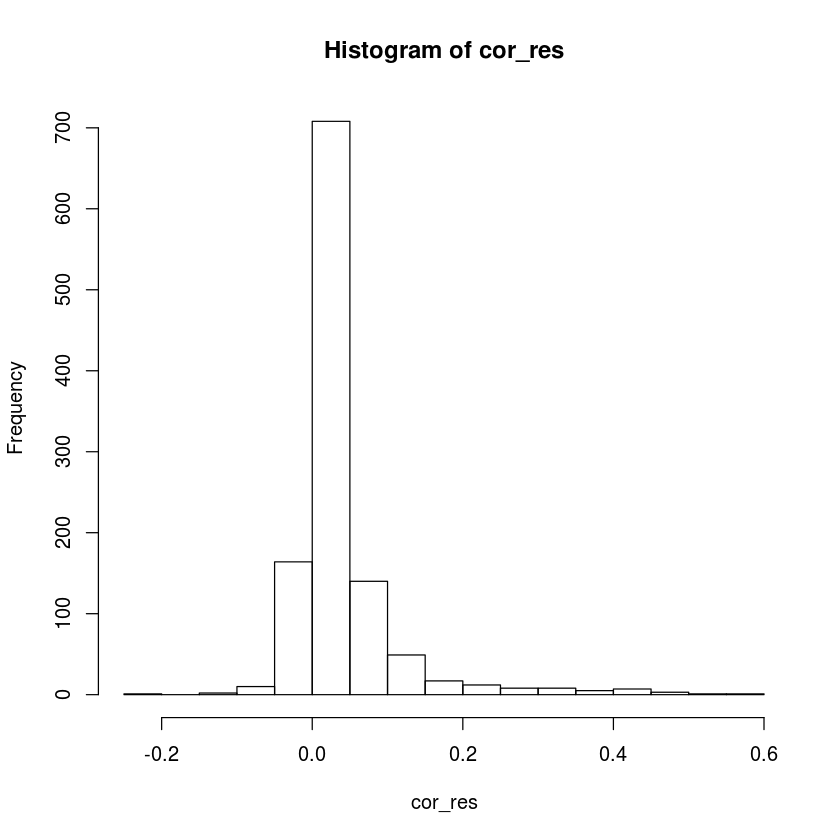

In [73]:
hist(cor_res)

In [79]:
idx <- which(cor_res > 0.5)
idx

[1]  698 1032

In [78]:
idx <- which(cor_res > 0.2)
idx

[1]   43   47   56   59   78   87   88  103  214  234  253  262  279  294  316
[16]  336  357  363  411  416  425  429  439  477  513  520  571  620  664  698
[31]  708  781  801  835  844  867  881  882  907  912  953  962 1032 1041 1166

In [77]:
idx

[1]   43   47   56   59   78   87   88  103  214  234  253  262  279  294  316
[16]  336  357  363  411  416  425  429  439  477  513  520  571  620  664  698
[31]  708  781  801  835  844  867  881  882  907  912  953  962 1032 1041 1166

[1] 0.5192112

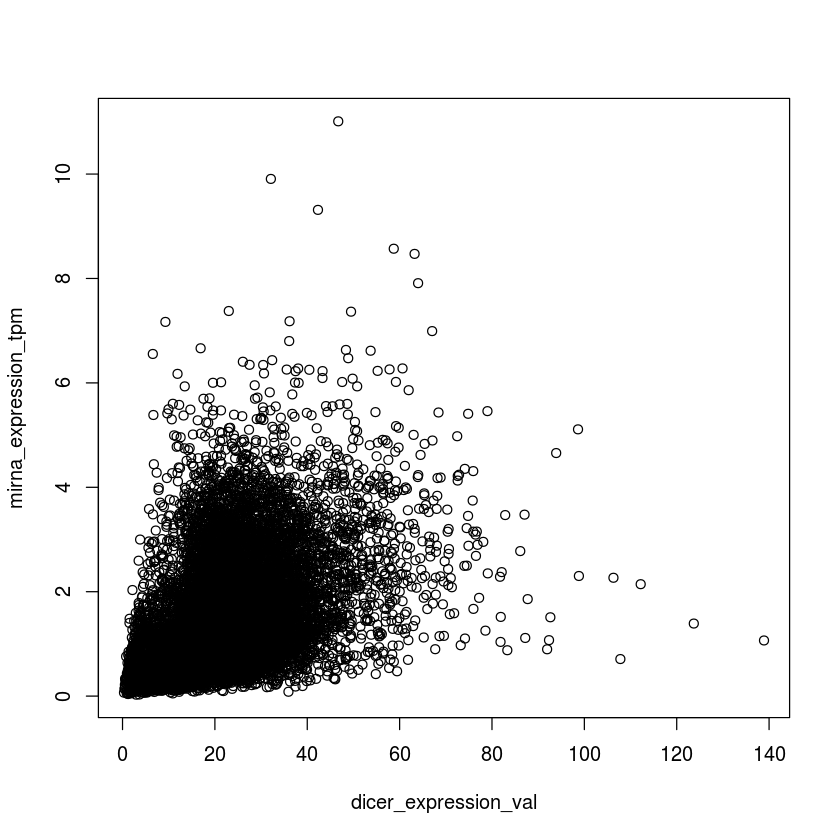

In [80]:
dicer_miRNA(698)

# normalized expression 

In [1]:
library(data.table)
sample_df <- fread("/ysm-gpfs/pi/zhao-data/zy92/GTEx_V8/GTEx_Analysis_v8_eQTL_expression_matrices/Adrenal_Gland.v8.normalized_expression.bed")

In [ ]:
dim(sample_df)

In [1]:
#ln <- load("/ysm-gpfs/pi/zhao/zy92/projects/utmost_update/GTEX/raw_expression.RData")
#ln

[1] "gene_info_target"       "expression_list_target" "tissue_vec_target"

In [1]:
library(data.table)
exp_df <- fread("/ysm-gpfs/pi/zhao-data/zy92/GTEx_V8/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct")

In [2]:
dim(exp_df)

[1] 56200 17384

In [3]:
exp_df[1:10, 1:10]

Name,Description,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2526-SM-5GZY6
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000223972.5,DDX11L1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
ENSG00000227232.5,WASH7P,8.76400,3.86100,7.34900,11.07000,3.30600,5.38900,11.99000,16.95000
ENSG00000278267.1,MIR6859-1,0.00000,0.00000,1.00400,0.00000,0.00000,0.00000,0.00000,0.00000
ENSG00000243485.5,MIR1302-2HG,0.07187,0.00000,0.00000,0.06761,0.00000,0.00000,0.00000,0.00000
ENSG00000237613.2,FAM138A,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.03904
ENSG00000268020.3,OR4G4P,0.00000,0.05600,0.00000,0.00000,0.00000,0.06130,0.09523,0.00000
ENSG00000240361.1,OR4G11P,0.06621,0.05004,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
ENSG00000186092.4,OR4F5,0.00000,0.10250,0.07434,0.00000,0.04233,0.05609,0.17430,0.00000
ENSG00000238009.6,RP11-34P13.7,0.00000,0.04574,0.09953,0.00000,0.07556,0.05006,0.03889,0.04627


In [4]:
file_vec <- list.files("/ysm-gpfs/pi/zhao-data/zy92/GTEx_V8/GTEx_Analysis_v8_eQTL_covariates/")
head(file_vec)

[1] "Adipose_Subcutaneous.v8.covariates.txt"    
[2] "Adipose_Visceral_Omentum.v8.covariates.txt"
[3] "Adrenal_Gland.v8.covariates.txt"           
[4] "Artery_Aorta.v8.covariates.txt"            
[5] "Artery_Coronary.v8.covariates.txt"         
[6] "Artery_Tibial.v8.covariates.txt"

In [5]:
as.character(sapply(file_vec, function(x) unlist(strsplit(x, "\\."))[1]))

[1] "Adipose_Subcutaneous"                 
 [2] "Adipose_Visceral_Omentum"             
 [3] "Adrenal_Gland"                        
 [4] "Artery_Aorta"                         
 [5] "Artery_Coronary"                      
 [6] "Artery_Tibial"                        
 [7] "Brain_Amygdala"                       
 [8] "Brain_Anterior_cingulate_cortex_BA24" 
 [9] "Brain_Caudate_basal_ganglia"          
[10] "Brain_Cerebellar_Hemisphere"          
[11] "Brain_Cerebellum"                     
[12] "Brain_Cortex"                         
[13] "Brain_Frontal_Cortex_BA9"             
[14] "Brain_Hippocampus"                    
[15] "Brain_Hypothalamus"                   
[16] "Brain_Nucleus_accumbens_basal_ganglia"
[17] "Brain_Putamen_basal_ganglia"          
[18] "Brain_Spinal_cord_cervical_c-1"       
[19] "Brain_Substantia_nigra"               
[20] "Breast_Mammary_Tissue"                
[21] "Cells_Cultured_fibroblasts"           
[22] "Cells_EBV-transformed_lymphocytes"    
[23] "Colon_Sigmoid"                        
[24] "Colon_Transverse"                     
[25] "Esophagus_Gastroesophageal_Junction"  
[26] "Esophagus_Mucosa"                     
[27] "Esophagus_Muscularis"                 
[28] "Heart_Atrial_Appendage"               
[29] "Heart_Left_Ventricle"                 
[30] "Kidney_Cortex"                        
[31] "Liver"                                
[32] "Lung"                                 
[33] "Minor_Salivary_Gland"                 
[34] "Muscle_Skeletal"                      
[35] "Nerve_Tibial"                         
[36] "Ovary"                                
[37] "Pancreas"                             
[38] "Pituitary"                            
[39] "Prostate"                             
[40] "Skin_Not_Sun_Exposed_Suprapubic"      
[41] "Skin_Sun_Exposed_Lower_leg"           
[42] "Small_Intestine_Terminal_Ileum"       
[43] "Spleen"                               
[44] "Stomach"                              
[45] "Testis"                               
[46] "Thyroid"                              
[47] "Uterus"                               
[48] "Vagina"                               
[49] "Whole_Blood"

In [6]:
tissue_vec <- as.character(sapply(file_vec, function(x) unlist(strsplit(x, "\\."))[1]))
tissue_df <- list()
tissue_idx <- list()
for (i in 1:length(file_vec)) {
    tmp_df <- as.data.frame(fread(paste0("/ysm-gpfs/pi/zhao-data/zy92/GTEx_V8/GTEx_Analysis_v8_eQTL_covariates/", file_vec[i])))
    tissue_df[[tissue_vec[i]]] <- tmp_df
    tissue_idx[[tissue_vec[i]]] <- colnames(tmp_df)[2:ncol(tmp_df)]
}
                                  

In [7]:
substr(colnames(exp_df)[3:10], 1, 10)

[1] "GTEX-1117F" "GTEX-1117F" "GTEX-1117F" "GTEX-1117F" "GTEX-1117F"
[6] "GTEX-1117F" "GTEX-1117F" "GTEX-1117F"

In [8]:
anno_df <- fread("/ysm-gpfs/pi/zhao-data/zy92/GTEx_V8/biobank_collection_20200909_070401.txt")

In [9]:
head(anno_df)

materialType,originalMaterialType,tissueSiteDetail,sex,ageBracket,hardyScale,brainTissueDonor,autolysisScore,rin,sampleId,tissueSampleId,subjectId,amount,volume,concentration,mass,pathologyNotes,hasExpressionData,hasGenotype
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
DNA:DNA Genomic,Whole Blood:Whole Blood,Whole Blood,male,50-59,Ventilator case,FALSE,NA,NA,GTEX-WYJK-0001-SM-3E5QC,GTEX-WYJK-0001,GTEX-WYJK,9813.246,491.42746,19.96886,0,,FALSE,TRUE
DNA:DNA Genomic,Whole Blood:Whole Blood,Whole Blood,female,40-49,Ventilator case,FALSE,NA,NA,GTEX-YB5K-0002-SM-3T6OW,GTEX-YB5K-0002,GTEX-YB5K,72758.720,582.06976,125.00000,0,,FALSE,FALSE
Cells:Cell Line Viable,Tissue:Fresh Tissue,Cells - Transformed fibroblasts,male,50-59,Fast death - natural causes,TRUE,NA,NA,GTEX-13112-0008-SM-4VDIJ,GTEX-13112-0008,GTEX-13112,0.000,0.00000,0.00000,0,,TRUE,TRUE
Cells:Cell Line Viable,Whole Blood:Whole Blood,Cells - EBV-transformed lymphocytes,male,50-59,Ventilator case,FALSE,NA,NA,GTEX-XXEK-0004-SM-43PHD,GTEX-XXEK-0004,GTEX-XXEK,0.000,0.00000,0.00000,0,,TRUE,TRUE
Cells:Cell Line Viable,Whole Blood:Whole Blood,Cells - EBV-transformed lymphocytes,male,60-69,Intermediate death,FALSE,NA,NA,GTEX-ZYW4-0001-SM-5Q68K,GTEX-ZYW4-0001,GTEX-ZYW4,0.000,0.00000,0.00000,0,,FALSE,TRUE
RNA:Total RNA,Whole Blood:PAXgene Preserved,Whole Blood,male,50-59,Intermediate death,TRUE,NA,8.761578,GTEX-ZYFD-0005-SM-4BS7Y,GTEX-ZYFD-0005,GTEX-ZYFD,14946.000,62.90404,237.60000,NA,,FALSE,TRUE


In [10]:
length(table(anno_df$tissueSiteDetail))

[1] 53

In [11]:
anno_list <- split(anno_df, f = anno_df$tissueSiteDetail )

In [12]:
length(anno_list)

[1] 53

In [13]:
unique(anno_df$tissueSiteDetail)

[1] "Whole Blood"                              
 [2] "Cells - Transformed fibroblasts"          
 [3] "Cells - EBV-transformed lymphocytes"      
 [4] "Minor Salivary Gland"                     
 [5] "Lung"                                     
 [6] "Skin - Sun Exposed (Lower leg)"           
 [7] "Esophagus - Gastroesophageal Junction"    
 [8] "Heart - Atrial Appendage"                 
 [9] "Nerve - Tibial"                           
[10] "Breast - Mammary Tissue"                  
[11] "Heart - Left Ventricle"                   
[12] "Artery - Aorta"                           
[13] "Thyroid"                                  
[14] "Colon - Sigmoid"                          
[15] "Adipose - Visceral (Omentum)"             
[16] "Uterus"                                   
[17] "Spleen"                                   
[18] "Small Intestine - Terminal Ileum"         
[19] "Vagina"                                   
[20] "Kidney - Cortex"                          
[21] "Prostate"                                 
[22] "Pancreas"                                 
[23] "Muscle - Skeletal"                        
[24] "Colon - Transverse"                       
[25] "Liver"                                    
[26] "Adrenal Gland"                            
[27] "Artery - Coronary"                        
[28] "Artery - Tibial"                          
[29] "Esophagus - Muscularis"                   
[30] "Testis"                                   
[31] "Skin - Not Sun Exposed (Suprapubic)"      
[32] "Brain - Cerebellum"                       
[33] "Cervix - Ectocervix"                      
[34] "Brain - Hypothalamus"                     
[35] "Brain - Amygdala"                         
[36] "Brain - Spinal cord (cervical c-1)"       
[37] "Brain - Cortex"                           
[38] "Adipose - Subcutaneous"                   
[39] "Esophagus - Mucosa"                       
[40] "Pituitary"                                
[41] "Brain - Hippocampus"                      
[42] "Brain - Substantia nigra"                 
[43] "Brain - Cerebellar Hemisphere"            
[44] "Stomach"                                  
[45] "Bladder"                                  
[46] "Brain - Anterior cingulate cortex (BA24)" 
[47] "Ovary"                                    
[48] "Brain - Nucleus accumbens (basal ganglia)"
[49] "Brain - Caudate (basal ganglia)"          
[50] "Brain - Frontal Cortex (BA9)"             
[51] "Brain - Putamen (basal ganglia)"          
[52] "Cervix - Endocervix"                      
[53] "Fallopian Tube"

In [14]:
tissue_vec

[1] "Adipose_Subcutaneous"                 
 [2] "Adipose_Visceral_Omentum"             
 [3] "Adrenal_Gland"                        
 [4] "Artery_Aorta"                         
 [5] "Artery_Coronary"                      
 [6] "Artery_Tibial"                        
 [7] "Brain_Amygdala"                       
 [8] "Brain_Anterior_cingulate_cortex_BA24" 
 [9] "Brain_Caudate_basal_ganglia"          
[10] "Brain_Cerebellar_Hemisphere"          
[11] "Brain_Cerebellum"                     
[12] "Brain_Cortex"                         
[13] "Brain_Frontal_Cortex_BA9"             
[14] "Brain_Hippocampus"                    
[15] "Brain_Hypothalamus"                   
[16] "Brain_Nucleus_accumbens_basal_ganglia"
[17] "Brain_Putamen_basal_ganglia"          
[18] "Brain_Spinal_cord_cervical_c-1"       
[19] "Brain_Substantia_nigra"               
[20] "Breast_Mammary_Tissue"                
[21] "Cells_Cultured_fibroblasts"           
[22] "Cells_EBV-transformed_lymphocytes"    
[23] "Colon_Sigmoid"                        
[24] "Colon_Transverse"                     
[25] "Esophagus_Gastroesophageal_Junction"  
[26] "Esophagus_Mucosa"                     
[27] "Esophagus_Muscularis"                 
[28] "Heart_Atrial_Appendage"               
[29] "Heart_Left_Ventricle"                 
[30] "Kidney_Cortex"                        
[31] "Liver"                                
[32] "Lung"                                 
[33] "Minor_Salivary_Gland"                 
[34] "Muscle_Skeletal"                      
[35] "Nerve_Tibial"                         
[36] "Ovary"                                
[37] "Pancreas"                             
[38] "Pituitary"                            
[39] "Prostate"                             
[40] "Skin_Not_Sun_Exposed_Suprapubic"      
[41] "Skin_Sun_Exposed_Lower_leg"           
[42] "Small_Intestine_Terminal_Ileum"       
[43] "Spleen"                               
[44] "Stomach"                              
[45] "Testis"                               
[46] "Thyroid"                              
[47] "Uterus"                               
[48] "Vagina"                               
[49] "Whole_Blood"

In [15]:
convert_str <- function(str_a) {
    str_a <- gsub("\\)", "", str_a)
    str_a <- gsub("\\(", "", str_a)
    str_a <- gsub(" - ", "_", str_a)
    str_b <- gsub(" ", "_", str_a)
    return(str_b)
}

In [16]:
tissue_vec_anno <- sapply(anno_df$tissueSiteDetail, convert_str)

In [17]:
length(tissue_vec_anno)

[1] 72513

In [18]:
unique(anno_df$tissueSiteDetail)

[1] "Whole Blood"                              
 [2] "Cells - Transformed fibroblasts"          
 [3] "Cells - EBV-transformed lymphocytes"      
 [4] "Minor Salivary Gland"                     
 [5] "Lung"                                     
 [6] "Skin - Sun Exposed (Lower leg)"           
 [7] "Esophagus - Gastroesophageal Junction"    
 [8] "Heart - Atrial Appendage"                 
 [9] "Nerve - Tibial"                           
[10] "Breast - Mammary Tissue"                  
[11] "Heart - Left Ventricle"                   
[12] "Artery - Aorta"                           
[13] "Thyroid"                                  
[14] "Colon - Sigmoid"                          
[15] "Adipose - Visceral (Omentum)"             
[16] "Uterus"                                   
[17] "Spleen"                                   
[18] "Small Intestine - Terminal Ileum"         
[19] "Vagina"                                   
[20] "Kidney - Cortex"                          
[21] "Prostate"                                 
[22] "Pancreas"                                 
[23] "Muscle - Skeletal"                        
[24] "Colon - Transverse"                       
[25] "Liver"                                    
[26] "Adrenal Gland"                            
[27] "Artery - Coronary"                        
[28] "Artery - Tibial"                          
[29] "Esophagus - Muscularis"                   
[30] "Testis"                                   
[31] "Skin - Not Sun Exposed (Suprapubic)"      
[32] "Brain - Cerebellum"                       
[33] "Cervix - Ectocervix"                      
[34] "Brain - Hypothalamus"                     
[35] "Brain - Amygdala"                         
[36] "Brain - Spinal cord (cervical c-1)"       
[37] "Brain - Cortex"                           
[38] "Adipose - Subcutaneous"                   
[39] "Esophagus - Mucosa"                       
[40] "Pituitary"                                
[41] "Brain - Hippocampus"                      
[42] "Brain - Substantia nigra"                 
[43] "Brain - Cerebellar Hemisphere"            
[44] "Stomach"                                  
[45] "Bladder"                                  
[46] "Brain - Anterior cingulate cortex (BA24)" 
[47] "Ovary"                                    
[48] "Brain - Nucleus accumbens (basal ganglia)"
[49] "Brain - Caudate (basal ganglia)"          
[50] "Brain - Frontal Cortex (BA9)"             
[51] "Brain - Putamen (basal ganglia)"          
[52] "Cervix - Endocervix"                      
[53] "Fallopian Tube"

In [19]:
tissue_anno_vec <- unique(tissue_vec_anno)
tissue_anno_vec

[1] "Whole_Blood"                          
 [2] "Cells_Transformed_fibroblasts"        
 [3] "Cells_EBV-transformed_lymphocytes"    
 [4] "Minor_Salivary_Gland"                 
 [5] "Lung"                                 
 [6] "Skin_Sun_Exposed_Lower_leg"           
 [7] "Esophagus_Gastroesophageal_Junction"  
 [8] "Heart_Atrial_Appendage"               
 [9] "Nerve_Tibial"                         
[10] "Breast_Mammary_Tissue"                
[11] "Heart_Left_Ventricle"                 
[12] "Artery_Aorta"                         
[13] "Thyroid"                              
[14] "Colon_Sigmoid"                        
[15] "Adipose_Visceral_Omentum"             
[16] "Uterus"                               
[17] "Spleen"                               
[18] "Small_Intestine_Terminal_Ileum"       
[19] "Vagina"                               
[20] "Kidney_Cortex"                        
[21] "Prostate"                             
[22] "Pancreas"                             
[23] "Muscle_Skeletal"                      
[24] "Colon_Transverse"                     
[25] "Liver"                                
[26] "Adrenal_Gland"                        
[27] "Artery_Coronary"                      
[28] "Artery_Tibial"                        
[29] "Esophagus_Muscularis"                 
[30] "Testis"                               
[31] "Skin_Not_Sun_Exposed_Suprapubic"      
[32] "Brain_Cerebellum"                     
[33] "Cervix_Ectocervix"                    
[34] "Brain_Hypothalamus"                   
[35] "Brain_Amygdala"                       
[36] "Brain_Spinal_cord_cervical_c-1"       
[37] "Brain_Cortex"                         
[38] "Adipose_Subcutaneous"                 
[39] "Esophagus_Mucosa"                     
[40] "Pituitary"                            
[41] "Brain_Hippocampus"                    
[42] "Brain_Substantia_nigra"               
[43] "Brain_Cerebellar_Hemisphere"          
[44] "Stomach"                              
[45] "Bladder"                              
[46] "Brain_Anterior_cingulate_cortex_BA24" 
[47] "Ovary"                                
[48] "Brain_Nucleus_accumbens_basal_ganglia"
[49] "Brain_Caudate_basal_ganglia"          
[50] "Brain_Frontal_Cortex_BA9"             
[51] "Brain_Putamen_basal_ganglia"          
[52] "Cervix_Endocervix"                    
[53] "Fallopian_Tube"

In [20]:
tissue_vec

[1] "Adipose_Subcutaneous"                 
 [2] "Adipose_Visceral_Omentum"             
 [3] "Adrenal_Gland"                        
 [4] "Artery_Aorta"                         
 [5] "Artery_Coronary"                      
 [6] "Artery_Tibial"                        
 [7] "Brain_Amygdala"                       
 [8] "Brain_Anterior_cingulate_cortex_BA24" 
 [9] "Brain_Caudate_basal_ganglia"          
[10] "Brain_Cerebellar_Hemisphere"          
[11] "Brain_Cerebellum"                     
[12] "Brain_Cortex"                         
[13] "Brain_Frontal_Cortex_BA9"             
[14] "Brain_Hippocampus"                    
[15] "Brain_Hypothalamus"                   
[16] "Brain_Nucleus_accumbens_basal_ganglia"
[17] "Brain_Putamen_basal_ganglia"          
[18] "Brain_Spinal_cord_cervical_c-1"       
[19] "Brain_Substantia_nigra"               
[20] "Breast_Mammary_Tissue"                
[21] "Cells_Cultured_fibroblasts"           
[22] "Cells_EBV-transformed_lymphocytes"    
[23] "Colon_Sigmoid"                        
[24] "Colon_Transverse"                     
[25] "Esophagus_Gastroesophageal_Junction"  
[26] "Esophagus_Mucosa"                     
[27] "Esophagus_Muscularis"                 
[28] "Heart_Atrial_Appendage"               
[29] "Heart_Left_Ventricle"                 
[30] "Kidney_Cortex"                        
[31] "Liver"                                
[32] "Lung"                                 
[33] "Minor_Salivary_Gland"                 
[34] "Muscle_Skeletal"                      
[35] "Nerve_Tibial"                         
[36] "Ovary"                                
[37] "Pancreas"                             
[38] "Pituitary"                            
[39] "Prostate"                             
[40] "Skin_Not_Sun_Exposed_Suprapubic"      
[41] "Skin_Sun_Exposed_Lower_leg"           
[42] "Small_Intestine_Terminal_Ileum"       
[43] "Spleen"                               
[44] "Stomach"                              
[45] "Testis"                               
[46] "Thyroid"                              
[47] "Uterus"                               
[48] "Vagina"                               
[49] "Whole_Blood"

In [21]:
anno_df$tissue <- tissue_vec_anno

In [22]:
anno_list <- split(anno_df, f = anno_df$tissue)

In [25]:
ln <- load("/gpfs/project/zhao/zy92/GTEX/sample_annotation.rdata")
ln

[1] "sample_annotation"

In [26]:
tissue_anno_vec <- sapply(sample_annotation$SMTSD, convert_str)
sample_annotation$tissue <- tissue_anno_vec

In [27]:
anno_list <- split(sample_annotation, f = sample_annotation$tissue)

In [29]:
tissue_anno_vec_uniq <- unique(tissue_anno_vec)

In [30]:
dim(anno_list[[tissue_anno_vec_uniq[3]]])

[1] 763  64

In [31]:
anno_list[[tissue_anno_vec_uniq[3]]]$SAMPID[1:24]

[1] "GTEX-1117F-0226-SM-5GZZ7" "GTEX-111CU-1826-SM-5GZYN"
 [3] "GTEX-111FC-0226-SM-5N9B8" "GTEX-111FC-1426-SM-5N9C7"
 [5] "GTEX-111VG-2326-SM-5N9BK" "GTEX-111YS-2426-SM-5GZZQ"
 [7] "GTEX-1122O-2026-SM-5NQ91" "GTEX-1122O-2026-SM-9YFMG"
 [9] "GTEX-1128S-2126-SM-5H12U" "GTEX-113IC-0226-SM-5HL5C"
[11] "GTEX-117YX-2226-SM-5EGJJ" "GTEX-11DXW-0326-SM-5H11W"
[13] "GTEX-11DXX-2326-SM-5Q5A2" "GTEX-11DXX-2326-SM-9YFKS"
[15] "GTEX-11DXZ-2226-SM-5EGH2" "GTEX-11DZ1-0226-SM-5A5KF"
[17] "GTEX-11EI6-0226-SM-5EQ64" "GTEX-11EM3-2326-SM-5H12B"
[19] "GTEX-11EMC-2826-SM-5PNY6" "GTEX-11EQ8-0226-SM-5EQ5G"
[21] "GTEX-11EQ9-2526-SM-5HL66" "GTEX-11GS4-2626-SM-5A5LD"
[23] "GTEX-11GSO-2326-SM-5A5LX" "GTEX-11H98-0226-SM-5NQ89"

In [32]:
head(anno_list[[tissue_anno_vec_uniq[2]]]$SAMPID)

[1] "GTEX-1117F-0011-R10a-SM-AHZ7F" "GTEX-1117F-0011-R10b-SM-CYKQ8"
[3] "GTEX-111FC-0011-R10a-SM-AHZ7K" "GTEX-111FC-0011-R10a-SM-CYKQ9"
[5] "GTEX-117XS-0011-R10a-SM-AHZ7G" "GTEX-1192X-0011-R10a-SM-CYKSL"

In [33]:
sum(anno_list[[tissue_anno_vec_uniq[2]]]$SAMPID %in% sample_id)

[1] 209

In [34]:
head(sample_id)

[1] "Name"                     "Description"             
[3] "GTEX-1117F-0226-SM-5GZZ7" "GTEX-1117F-0426-SM-5EGHI"
[5] "GTEX-1117F-0526-SM-5EGHJ" "GTEX-1117F-0626-SM-5N9CS"

In [35]:
exp_df <- as.data.frame(exp_df)

In [36]:
sample_id <- colnames(exp_df)
df_list <- list()
for (i in 1:length(tissue_anno_vec_uniq)) {
    print(paste0("INFO: ", i))
    tissue <- tissue_anno_vec_uniq[i]
    tissue_id <- anno_list[[tissue]]$SAMPID
    idx_tissue <- match(tissue_id, sample_id)
    print(length(tissue_id))
    print(sum(!is.na(idx_tissue)))
    print(length(idx_tissue[!is.na(idx_tissue)]))
    df_list[[tissue]] <- exp_df[, c(1, 2, idx_tissue[!is.na(idx_tissue)])]
} 

[1] "INFO: 1"
[1] 3288
[1] 755
[1] 755
[1] "INFO: 2"
[1] 425
[1] 209
[1] 209
[1] "INFO: 3"
[1] 763
[1] 663
[1] 663
[1] "INFO: 4"
[1] 1132
[1] 803
[1] 803
[1] "INFO: 5"
[1] 770
[1] 663
[1] 663
[1] "INFO: 6"
[1] 253
[1] 240
[1] 240
[1] "INFO: 7"
[1] 452
[1] 429
[1] 429
[1] "INFO: 8"
[1] 564
[1] 541
[1] 541
[1] "INFO: 9"
[1] 195
[1] 180
[1] 180
[1] "INFO: 10"
[1] 166
[1] 142
[1] 142
[1] "INFO: 11"
[1] 173
[1] 156
[1] 156
[1] "INFO: 12"
[1] 480
[1] 459
[1] 459
[1] "INFO: 13"
[1] 638
[1] 604
[1] 604
[1] "INFO: 14"
[1] 181
[1] 162
[1] 162
[1] "INFO: 15"
[1] 325
[1] 255
[1] 255
[1] "INFO: 16"
[1] 275
[1] 258
[1] 258
[1] "INFO: 17"
[1] 812
[1] 653
[1] 653
[1] "INFO: 18"
[1] 867
[1] 578
[1] 578
[1] "INFO: 19"
[1] 260
[1] 241
[1] 241
[1] "INFO: 20"
[1] 360
[1] 328
[1] 328
[1] "INFO: 21"
[1] 559
[1] 515
[1] 515
[1] "INFO: 22"
[1] 622
[1] 555
[1] 555
[1] "INFO: 23"
[1] 401
[1] 375
[1] 375
[1] "INFO: 24"
[1] 381
[1] 359
[1] 359
[1] "INFO: 25"
[1] 389
[1] 373
[1] 373
[1] "INFO: 26"
[1] 193
[1] 187
[

In [37]:
dim(df_list[[tissue_anno_vec_uniq[2]]])

[1] 56200   211

In [38]:
df_list[[tissue_anno_vec_uniq[2]]]

Name,Description,GTEX-1192X-0011-R10a-SM-DO941,GTEX-11DXY-0011-R10b-SM-DO12C,GTEX-11DYG-0011-R10b-SM-DNZZO,GTEX-11DZ1-0011-R10b-SM-DO943,GTEX-11EI6-0011-R10a-SM-DO93R,GTEX-11EMC-0011-R10a-SM-DNZZJ,GTEX-11GSP-0011-R10a-SM-5NQ7J,GTEX-11H98-0011-R10b-SM-5NQ98,⋯,GTEX-Z93S-0011-R10a-SM-4RGNM,GTEX-ZAB4-0011-R10a-SM-4SOKH,GTEX-ZDXO-0011-R10a-SM-4WWD8,GTEX-ZE7O-0011-R10a-SM-57WAZ,GTEX-ZF28-0011-R10a-SM-4WWEH,GTEX-ZUA1-0011-R10a-SM-51MT6,GTEX-ZV68-0011-R10a-SM-51MT7,GTEX-ZVT3-0011-R10b-SM-57WB6,GTEX-ZVZQ-0011-R10b-SM-51MRT,GTEX-ZXG5-0011-R10a-SM-57WDD
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000223972.5,DDX11L1,0.03947,0.00000,0.000000,0.00000,0.00000,0.03262,0.00000,0.00000,⋯,0.00000,0.00000,0.00000,0.00000,0.01776,0.00000,0.01256,0.02404,0.01716,0.00000
ENSG00000227232.5,WASH7P,1.54200,2.61000,1.643000,2.88300,1.40900,2.63300,1.62000,1.70400,⋯,2.08500,4.54200,6.47500,4.34500,3.07500,1.04100,1.32400,2.25300,1.89900,1.12400
ENSG00000278267.1,MIR6859-1,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
ENSG00000243485.5,MIR1302-2HG,0.03940,0.00000,0.028630,0.00000,0.00000,0.00000,0.03600,0.00000,⋯,0.03899,0.00000,0.00000,0.00000,0.03546,0.00000,0.05013,0.14400,0.06851,0.03592
ENSG00000237613.2,FAM138A,0.00000,0.00000,0.000000,0.00000,0.00000,0.02314,0.00000,0.00000,⋯,0.00000,0.02661,0.00000,0.03978,0.07557,0.00000,0.00000,0.03409,0.00000,0.00000
ENSG00000268020.3,OR4G4P,0.00000,0.06550,0.147600,0.00000,0.07956,0.06715,0.00000,0.14690,⋯,0.00000,0.00000,0.05223,0.05773,0.07311,0.12420,0.12920,0.04947,0.17660,0.00000
ENSG00000240361.1,OR4G11P,0.07260,0.17560,0.079130,0.00000,0.10660,0.09001,0.06634,0.13130,⋯,0.00000,0.00000,0.00000,0.10320,0.06533,0.13870,0.16170,0.13260,0.09467,0.06619
ENSG00000186092.4,OR4F5,0.03717,0.05994,0.162100,0.00000,0.07280,0.09217,0.06793,0.04482,⋯,0.14710,0.07066,0.09558,0.05282,0.10040,0.05682,0.07094,0.18110,0.16160,0.10170
ENSG00000238009.6,RP11-34P13.7,0.00000,0.00000,0.012050,0.00000,0.00000,0.00000,0.01516,0.02000,⋯,0.01641,0.00000,0.02133,0.04715,0.05971,0.06340,0.01055,0.02020,0.04326,0.00000


In [41]:
df_list[[1]][1:6, 1:2]

,Name,Description
,<chr>,<chr>
1,ENSG00000223972.5,DDX11L1
2,ENSG00000227232.5,WASH7P
3,ENSG00000278267.1,MIR6859-1
4,ENSG00000243485.5,MIR1302-2HG
5,ENSG00000237613.2,FAM138A
6,ENSG00000268020.3,OR4G4P


In [42]:
library("biomaRt")
ensembl <- useMart("ensembl")
datasets <- listDatasets(ensembl)
head(datasets)
ensembl = useDataset("hsapiens_gene_ensembl", mart=ensembl)



,dataset,description,version
,<I<chr>>,<I<chr>>,<I<chr>>
1,acalliptera_gene_ensembl,Eastern happy genes (fAstCal1.2),fAstCal1.2
2,acarolinensis_gene_ensembl,Anole lizard genes (AnoCar2.0),AnoCar2.0
3,acchrysaetos_gene_ensembl,Golden eagle genes (bAquChr1.2),bAquChr1.2
4,acitrinellus_gene_ensembl,Midas cichlid genes (Midas_v5),Midas_v5
5,amelanoleuca_gene_ensembl,Panda genes (ailMel1),ailMel1
6,amexicanus_gene_ensembl,Mexican tetra genes (Astyanax_mexicanus-2.0),Astyanax_mexicanus-2.0


In [98]:
filters = listFilters(ensembl)
idx_start = "start" %in% filters[, 1]

In [111]:
length(filters[,1])

[1] 432

In [113]:
filters[300:399, 1]

[1] "with_pranga_homolog"            "with_omelastigma_homolog"      
  [3] "with_olhni_homolog"             "with_olhsok_homolog"           
  [5] "with_olatipes_homolog"          "with_cjaponica_homolog"        
  [7] "with_sfasciatus_homolog"        "with_shabroptila_homolog"      
  [9] "with_dordii_homolog"            "with_pcinereus_homolog"        
 [11] "with_pmarinus_homolog"          "with_lcrocea_homolog"          
 [13] "with_ppardus_homolog"           "with_jjaculus_homolog"         
 [15] "with_etelfairi_homolog"         "with_enaucrates_homolog"       
 [17] "with_clanigera_homolog"         "with_nbrichardi_homolog"       
 [19] "with_anancymaae_homolog"        "with_mmulatta_homolog"         
 [21] "with_pnyererei_homolog"         "with_aplatyrhynchos_homolog"   
 [23] "with_cjacchus_homolog"          "with_pvampyrus_homolog"        
 [25] "with_amexicanus_homolog"        "with_mlucifugus_homolog"       
 [27] "with_acitrinellus_homolog"      "with_munguiculatus_homolog"    
 [29] "with_mmusculus_homolog"         "with_mmurinus_homolog"         
 [31] "with_fheteroclitus_homolog"     "with_hgfemale_homolog"         
 [33] "with_hgmale_homolog"            "with_oniloticus_homolog"       
 [35] "with_pmbairdii_homolog"         "with_elucius_homolog"          
 [37] "with_panubis_homolog"           "with_mdomestica_homolog"       
 [39] "with_pabelii_homolog"           "with_sorbicularis_homolog"     
 [41] "with_ampachon_homolog"          "with_cpbellii_homolog"         
 [43] "with_amelanoleuca_homolog"      "with_sscrofa_homolog"          
 [45] "with_mnemestrina_homolog"       "with_oprinceps_homolog"        
 [47] "with_mmurdjan_homolog"          "with_oanatinus_homolog"        
 [49] "with_umaritimus_homolog"        "with_mochrogaster_homolog"     
 [51] "with_ocuniculus_homolog"        "with_omykiss_homolog"          
 [53] "with_rnorvegicus_homolog"       "with_vvulpes_homolog"          
 [55] "with_pnattereri_homolog"        "with_ecalabaricus_homolog"     
 [57] "with_mcaroli_homolog"           "with_scerevisiae_homolog"      
 [59] "with_platipinna_homolog"        "with_oaries_homolog"           
 [61] "with_cvariegatus_homolog"       "with_pmexicana_homolog"        
 [63] "with_saraneus_homolog"          "with_mpahari_homolog"          
 [65] "with_bsplendens_homolog"        "with_choffmanni_homolog"       
 [67] "with_catys_homolog"             "with_loculatus_homolog"        
 [69] "with_itridecemlineatus_homolog" "with_mspicilegus_homolog"      
 [71] "with_gaculeatus_homolog"        "with_malbus_homolog"           
 [73] "with_csyrichta_homolog"         "with_sharrisii_homolog"        
 [75] "with_tnigroviridis_homolog"     "with_ptaltaica_homolog"        
 [77] "with_hcomes_homolog"            "with_csemilaevis_homolog"      
 [79] "with_tbelangeri_homolog"        "with_xtropicalis_homolog"      
 [81] "with_spunctatus_homolog"        "with_smaximus_homolog"         
 [83] "with_mgallopavo_homolog"        "with_ptephrosceles_homolog"    
 [85] "with_ngalili_homolog"           "with_csabaeus_homolog"         
 [87] "with_neugenii_homolog"          "with_bmutus_homolog"           
 [89] "with_sldorsalis_homolog"        "with_tguttata_homolog"         
 [91] "with_mzebra_homolog"            "with_drerio_homolog"           
 [93] "with_marmatus_homolog"          "with_interpro"                 
 [95] "with_family"                    "with_cdd"                      
 [97] "with_gene3d"                    "with_hamap"                    
 [99] "with_mobidblite"                "with_ncoils"

In [43]:
#filters = listFilters(ensembl)
#filters[101:150, 1]

In [44]:
ensembl_clean <- as.character(sapply(df_list[[1]]$Name, function(x) unlist(strsplit(x, "\\."))[1]))

In [135]:
joint_df <- data.frame(ensembl_clean, ensembl_id = df_list[[1]]$Name)

In [136]:
head(joint_df)

,ensembl_clean,ensembl_id
,<fct>,<fct>
1,ENSG00000223972,ENSG00000223972.5
2,ENSG00000227232,ENSG00000227232.5
3,ENSG00000278267,ENSG00000278267.1
4,ENSG00000243485,ENSG00000243485.5
5,ENSG00000237613,ENSG00000237613.2
6,ENSG00000268020,ENSG00000268020.3


In [46]:
res <- getBM(attributes=c('ensembl_gene_id', 'hgnc_symbol', 'transcript_biotype', 
                         'chromosome_name', 'transcript_start', 'transcript_end'), 
      filters = 'ensembl_gene_id', 
      values = ensembl_clean, 
      mart = ensembl)

In [47]:
head(res)

,ensembl_gene_id,hgnc_symbol,transcript_biotype,chromosome_name,transcript_start,transcript_end
,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,ENSG00000007923,DNAJC11,processed_transcript,1,6670461,6701819
2,ENSG00000007923,DNAJC11,processed_transcript,1,6654108,6701823
3,ENSG00000007923,DNAJC11,processed_transcript,1,6653809,6701804
4,ENSG00000007923,DNAJC11,protein_coding,1,6635113,6701924
5,ENSG00000007923,DNAJC11,processed_transcript,1,6637301,6645112
6,ENSG00000007923,DNAJC11,protein_coding,1,6645800,6701802


In [114]:
res_protein_coding_complete <- res %>% filter(transcript_biotype == "protein_coding")

In [115]:
dim(res_protein_coding_complete)

[1] 81205     6

In [105]:
res_chr <- getBM(attributes=c('ensembl_gene_id', 'hgnc_symbol', 'chromosome_name'), 
      filters = 'ensembl_gene_id', 
      values = ensembl_clean[1:6], 
      mart = ensembl)

ERROR: Error in getBM(attributes = c("ensembl_gene_id", "hgnc_symbol", "chromosome_name", : Invalid attribute(s): start, end 
Please use the function 'listAttributes' to get valid attribute names


In [97]:
dim(exp_df)

[1] 56200 17384

In [96]:
dim(res_chr)

[1] 55672     3

In [130]:
res_summary <- res %>% 
    group_by(ensembl_gene_id) %>%
    summarize(hgnc_symbol = hgnc_symbol[1], chromosome_name = chromosome_name[1], gene_start = min(transcript_start), gene_end = max(transcript_end))

`summarise()` ungrouping output (override with `.groups` argument)



In [137]:
res_summary <- res_summary %>%
    left_join(joint_df, by = c("ensembl_gene_id" = "ensembl_clean"))

In [138]:
head(res_summary)

ensembl_gene_id,hgnc_symbol,chromosome_name,gene_start,gene_end,ensembl_id
<chr>,<chr>,<chr>,<int>,<int>,<fct>
ENSG00000000003,TSPAN6,X,100627108,100639991,ENSG00000000003.14
ENSG00000000005,TNMD,X,100584936,100599885,ENSG00000000005.5
ENSG00000000419,DPM1,20,50934867,50958555,ENSG00000000419.12
ENSG00000000457,SCYL3,1,169849631,169894267,ENSG00000000457.13
ENSG00000000460,C1orf112,1,169662007,169854080,ENSG00000000460.16
ENSG00000000938,FGR,1,27612064,27635185,ENSG00000000938.12


In [132]:
dim(res_summary)

[1] 55625     5

In [127]:
res %>% filter(ensembl_gene_id == "ENSG00000000003")

ensembl_gene_id,hgnc_symbol,transcript_biotype,chromosome_name,transcript_start,transcript_end
<chr>,<chr>,<chr>,<chr>,<int>,<int>
ENSG00000000003,TSPAN6,protein_coding,X,100627108,100636806
ENSG00000000003,TSPAN6,processed_transcript,X,100632541,100636689
ENSG00000000003,TSPAN6,processed_transcript,X,100633442,100639991
ENSG00000000003,TSPAN6,protein_coding,X,100627109,100637104
ENSG00000000003,TSPAN6,protein_coding,X,100632063,100637104


In [125]:
dim(res_summary)

[1] 55625     3

In [92]:
save(res, file = "/ysm-gpfs/pi/zhao-data/zy92/GTEx_V8/processed_data/annotation_complete.RData")

In [106]:
dim(res_chr)

[1] 55672     3

In [139]:
save(res_summary, file = "/ysm-gpfs/pi/zhao-data/zy92/GTEx_V8/processed_data/annotation_complete_chr.RData")

In [134]:
head(res_summary)

ensembl_gene_id,hgnc_symbol,chromosome_name,gene_start,gene_end
<chr>,<chr>,<chr>,<int>,<int>
ENSG00000000003,TSPAN6,X,100627108,100639991
ENSG00000000005,TNMD,X,100584936,100599885
ENSG00000000419,DPM1,20,50934867,50958555
ENSG00000000457,SCYL3,1,169849631,169894267
ENSG00000000460,C1orf112,1,169662007,169854080
ENSG00000000938,FGR,1,27612064,27635185


In [49]:
library(dplyr)
res_protein_coding <- res %>% 
    filter(transcript_biotype == "protein_coding")


Attaching package: ‘dplyr’


The following object is masked from ‘package:biomaRt’:

    select


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [50]:
dim(res_protein_coding)

[1] 81205     6

In [51]:
table(res$transcript_biotype)


                         IG_C_gene                    IG_C_pseudogene 
                                24                                  9 
                         IG_D_gene                          IG_J_gene 
                                37                                 18 
                   IG_J_pseudogene                      IG_pseudogene 
                                 3                                  1 
                         IG_V_gene                    IG_V_pseudogene 
                               153                                188 
                            lncRNA                              miRNA 
                             41506                               1576 
                          misc_RNA                            Mt_rRNA 
                              2007                                  2 
                           Mt_tRNA                     non_stop_decay 
                                22                                 90 
     

In [52]:
res_lncRNA <- res %>% 
    filter(transcript_biotype == "lncRNA")
res_miRNA <- res %>% 
    filter(transcript_biotype == "miRNA")

In [53]:
dim(res_lncRNA)

[1] 41506     6

In [54]:
dim(res_miRNA)

[1] 1576    6

In [62]:
idx_lnc_pc <- res_lncRNA$ensembl_gene_id %in% res_protein_coding$ensembl_gene_id
idx_mirna_pc <- res_miRNA$ensembl_gene_id %in% res_protein_coding$ensembl_gene_id
idx_mirna_lnc <- res_miRNA$ensembl_gene_id %in% res_lncRNA$ensembl_gene_id

In [56]:
sum(c(1,2,3) %in% c(3,4,5))

[1] 1

In [65]:
sum(idx_lnc_pc)
sum(idx_mirna_pc)
sum(idx_mirna_lnc)

[1] 0

[1] 0

[1] 0

In [67]:
length(unique(res_lncRNA$ensembl_gene_id))
length(unique(res_protein_coding$ensembl_gene_id))
length(unique(res_miRNA$ensembl_gene_id))

[1] 13716

[1] 19207

[1] 1574

In [58]:

res_combined <- rbind(res_protein_coding, res_lncRNA, res_miRNA)

In [59]:
dim(res_combined)

[1] 124287      6

In [60]:
length(unique(res_combined$ensembl_gene_id))

[1] 34497

In [61]:
head(res_miRNA)

,ensembl_gene_id,hgnc_symbol,transcript_biotype,chromosome_name,transcript_start,transcript_end
,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,ENSG00000198976,MIR429,miRNA,1,1169005,1169087
2,ENSG00000207607,MIR200A,miRNA,1,1167863,1167952
3,ENSG00000207730,MIR200B,miRNA,1,1167104,1167198
4,ENSG00000207776,MIR551A,miRNA,1,3560695,3560790
5,ENSG00000263676,MIR4632,miRNA,1,12191713,12191773
6,ENSG00000264101,MIR4689,miRNA,1,5862672,5862741


In [ ]:
ensembl_id <- unique()

In [68]:
save(df_list, file = "/ysm-gpfs/pi/zhao-data/zy92/GTEx_V8/processed_data/exp_df_various_tissues.RData")

In [84]:
gene_id <- as.character(sapply(df_list[[1]]$Name, function(x) unlist(strsplit(x, "\\."))[[1]]))

In [85]:
# 
target_id <- unique(res_protein_coding$ensembl_gene_id)
idx_extract <- match(target_id, gene_id)
df_list_protein_coding <- lapply(df_list, function(x) x[idx_extract,])

target_id <- unique(res_lncRNA$ensembl_gene_id)
idx_extract <- match(target_id, gene_id)
df_list_lnc <- lapply(df_list, function(x) x[idx_extract,])

target_id <- unique(res_miRNA$ensembl_gene_id)
idx_extract <- match(target_id, gene_id)
df_list_mirna <- lapply(df_list, function(x) x[idx_extract,])

In [86]:
dim(df_list_protein_coding[[1]])
dim(df_list_lnc[[1]])
dim(df_list_mirna[[1]])


[1] 19207   757

[1] 13716   757

[1] 1574  757

In [89]:
#save(df_list_protein_coding, df_list_lnc, df_list_mirna, file = "/ysm-gpfs/pi/zhao-data/zy92/GTEx_V8/processed_data/exp_df_various_biotypes_various_tissues.RData")

In [88]:
head(df_list_mirna[[1]][3, 3:500])

,GTEX-111YS-0006-SM-5NQBE,GTEX-1122O-0005-SM-5O99J,GTEX-1128S-0005-SM-5P9HI,GTEX-113IC-0006-SM-5NQ9C,GTEX-113JC-0006-SM-5O997,GTEX-117XS-0005-SM-5PNU6,GTEX-117YW-0005-SM-5NQ8Z,GTEX-1192W-0005-SM-5NQBQ,GTEX-1192X-0005-SM-5NQC3,GTEX-11DXW-0006-SM-5NQ7Y,⋯,GTEX-1R9K5-0006-SM-DO939,GTEX-1R9PM-0006-SM-CYPTI,GTEX-1R9PN-0006-SM-DTX7L,GTEX-1R9PO-0006-SM-DO937,GTEX-1RAZA-0006-SM-CKZO9,GTEX-1RAZQ-0005-SM-DO93U,GTEX-1RAZR-0006-SM-DLHBR,GTEX-1RAZS-0005-SM-DO93D,GTEX-1RB15-0005-SM-CL53N,GTEX-1RDX4-0005-SM-DLHBS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
74,0,0.5486,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [ ]:
l

In [ ]:
hist(df_list_mirna[[1]][1, 3:500])

In [ ]:
hist(df_list_mirna[[1]][1, 3:500])

## Counting genes

In [1]:
library(data.table)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [16]:
expr_normalized_path <- "/gpfs/loomis/project/zhao/zy92/GTEX/expr_normalized/"
gene_vec <- c()
for (i in c(1:22, "X", "Y")) {
    tmp_dir <- paste0(expr_normalized_path, "/chr", i)
    gene_vec <- c(gene_vec, list.files(tmp_dir))
}

In [17]:
length(gene_vec)

[1] 39832

In [4]:
exp_path <- "/ysm-gpfs/pi/zhao-data/zy92/GTEx_V8/GTEx_Analysis_v8_eQTL_expression_matrices/"
file_vec <- list.files(exp_path, pattern = "*.bed$")


In [5]:
head(file_vec)

[1] "Adipose_Subcutaneous.v8.normalized_expression.bed"    
[2] "Adipose_Visceral_Omentum.v8.normalized_expression.bed"
[3] "Adrenal_Gland.v8.normalized_expression.bed"           
[4] "Artery_Aorta.v8.normalized_expression.bed"            
[5] "Artery_Coronary.v8.normalized_expression.bed"         
[6] "Artery_Tibial.v8.normalized_expression.bed"

In [6]:
exp_normalized_list <- list()
for (i in 1:length(file_vec)) {
    tmp_dir <- paste0(exp_path, file_vec[i])
    exp_normalized_list[[file_vec[i]]] <- as.data.frame(fread(tmp_dir))
}

In [7]:
dim(exp_normalized_list[[1]])

[1] 24665   585

In [10]:
exp_normalized_list[[1]][1:6, 1:6]

,#chr,start,end,gene_id,GTEX-1117F,GTEX-111CU
,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>
1,chr1,29552,29553,ENSG00000227232.5,1.31353292,-0.9007945
2,chr1,135894,135895,ENSG00000268903.1,-0.39787592,0.5724601
3,chr1,137964,137965,ENSG00000269981.1,0.06033348,0.9953057
4,chr1,173861,173862,ENSG00000241860.6,0.22586574,-0.8197281
5,chr1,195410,195411,ENSG00000279457.4,0.29268956,-1.0023984
6,chr1,297501,297502,ENSG00000228463.9,-0.53232385,0.4165933


In [2]:
ln <- load("/ysm-gpfs/pi/zhao-data/zy92/GTEx_V8/processed_data/exp_df_various_biotypes_various_tissues.RData")
ln

[1] "df_list_protein_coding" "df_list_lnc"            "df_list_mirna"

In [19]:
dim(df_list)

NULL

In [11]:
gene_vec <- lapply(exp_normalized_list, function(x) x[,4])

In [15]:
length(unique(unlist(gene_vec)))

[1] 39832

In [ ]:
gene_vec

In [ ]:
length(unique(res_lncRNA$ensembl_gene_id))
length(unique(res_protein_coding$ensembl_gene_id))
length(unique(res_miRNA$ensembl_gene_id))

In [ ]:
gene_vec

In [25]:
sum(df_list_mirna[[1]]$Name %in% gene_vec)


[1] 62

In [26]:
sum(df_list_protein_coding[[1]]$Name %in% gene_vec)



[1] 18687

In [27]:
sum(df_list_lnc[[1]]$Name %in% gene_vec)



[1] 11869

In [22]:
head(gene_vec)

[1] "ENSG00000000457.13" "ENSG00000000460.16" "ENSG00000000938.12"
[4] "ENSG00000000971.15" "ENSG00000001460.17" "ENSG00000001461.16"

In [1]:
library(RSQLite)

In [2]:
con <- dbConnect(SQLite(), "/home/zy92/scratch60/eqtl/mashr//mashr_Adipose_Subcutaneous.db")

In [ ]:
res <- dbSendQuery(con, "SELECT couunt(DISTINCT(gene)) FROM weights")


In [1]:
ln <- load("/ysm-gpfs/pi/zhao-data/zy92/TWAS/mashr_Adipose_Subcutaneous_gene.RData")
ln

[1] "gene_vec"

In [7]:
sum(df_list_lnc[[1]]$Name %in% gene_vec$gene)

[1] 1563

In [8]:
sum(df_list_mirna[[1]]$Name %in% gene_vec$gene)

[1] 0

In [9]:
sum(df_list_protein_coding[[1]]$Name %in% gene_vec$gene)

[1] 13044

In [4]:
head(gene_vec)

,gene
,<chr>
1,ENSG00000000457.13
2,ENSG00000000460.16
3,ENSG00000000938.12
4,ENSG00000001084.10
5,ENSG00000001167.14
6,ENSG00000001460.17


In [10]:
length(gene_vec$gene)

[1] 14732

In [12]:
hist(as.numeric(df_list_lnc[[1]][, 3:ncol(df_list_lnc[[1]])]))

ERROR: Error in hist(as.numeric(df_list_lnc[[1]][, 3:ncol(df_list_lnc[[1]])])): (list) object cannot be coerced to type 'double'


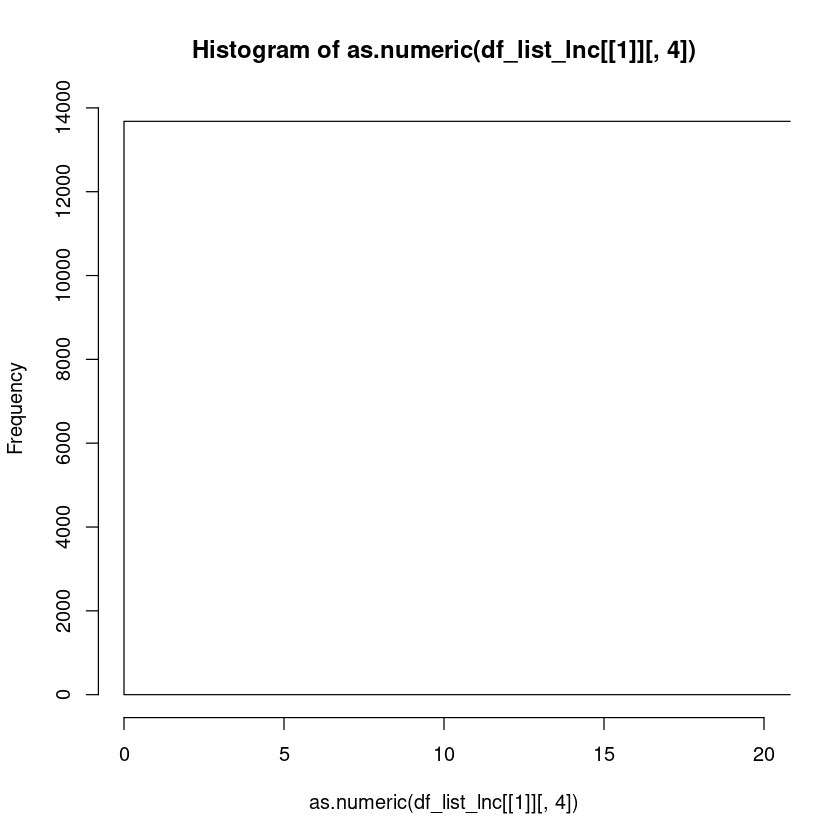

In [16]:
hist(as.numeric(df_list_lnc[[1]][,4]), xlim = c(0, 20))

In [17]:
df_list_lnc[[1]][1:8, 1:8]

,Name,Description,GTEX-111YS-0006-SM-5NQBE,GTEX-1122O-0005-SM-5O99J,GTEX-1128S-0005-SM-5P9HI,GTEX-113IC-0006-SM-5NQ9C,GTEX-113JC-0006-SM-5O997,GTEX-117XS-0005-SM-5PNU6
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
446,ENSG00000175147.11,TMEM51-AS1,0.04117,0.00000,0.01925,0.07937,0.01994,0.00000
169,ENSG00000177133.10,LINC00982,0.01341,0.01861,0.00000,0.08272,0.02598,0.03134
358,ENSG00000177553.6,RP11-56N19.5,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
48,ENSG00000177757.2,FAM87B,0.00000,0.22700,0.00000,0.18020,0.13580,0.02730
479,ENSG00000179743.4,FLJ37453,2.91600,4.94900,2.02000,7.61600,0.55310,0.75730
300,ENSG00000179840.5,PIK3CD-AS1,8.09400,13.92000,1.56000,3.49400,1.85500,1.22700
141,ENSG00000182873.5,PRKCZ-AS1,6.91300,14.24000,5.69900,12.52000,2.86400,1.22200
448,ENSG00000204464.7,C1orf195,0.00000,0.00000,0.00000,0.00000,0.06506,0.00000


In [19]:
class(df_list_lnc[[1]][1:8, 3:8])

[1] "data.frame"

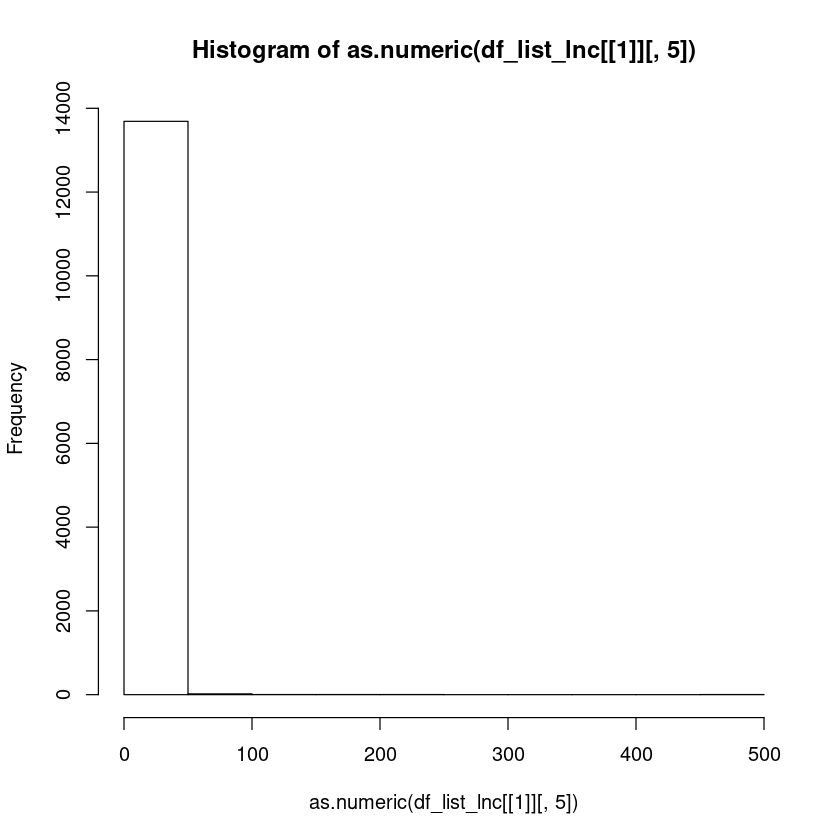

In [15]:
hist(as.numeric(df_list_lnc[[1]][,5]))

In [20]:
helper_mean <- function(df) {
    tmp_df <- apply(df[, 3:ncol(df)], 1, as.numeric)
    return(apply(tmp_df, 1, mean))
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



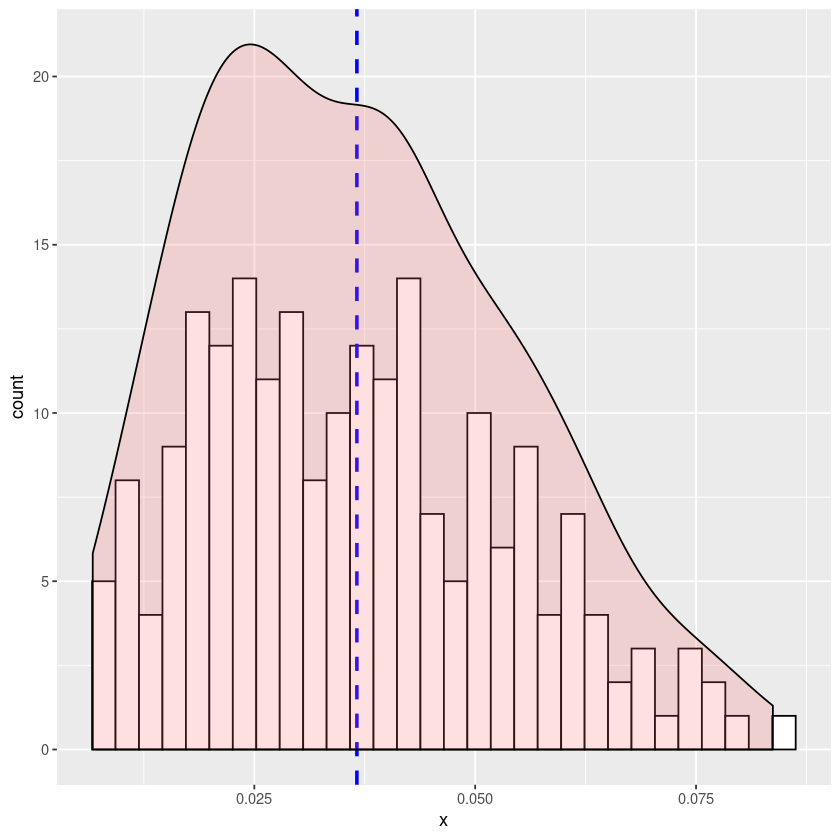

In [30]:
library(ggplot2)
vec = mean_res
df <- data.frame(
     x = vec
)

p <- ggplot(df, aes(x = x)) + 
    geom_histogram(color="black", fill="white") + 
    geom_vline(aes(xintercept=mean(x)), color="blue", linetype="dashed", size=1) + 
     geom_density(alpha=.2, fill="#FF6666") 
p


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



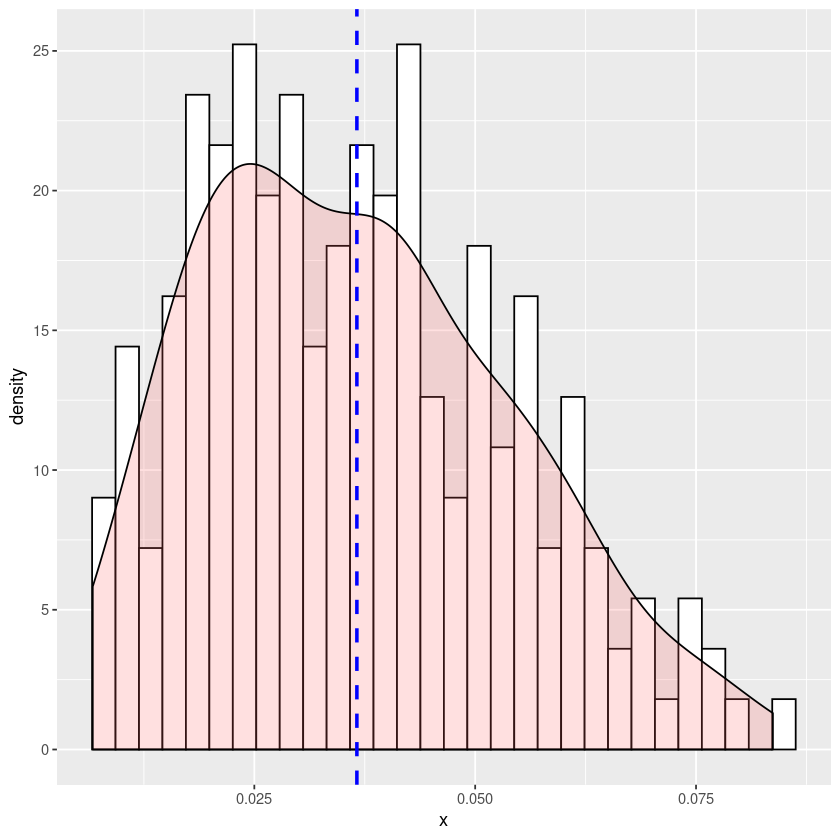

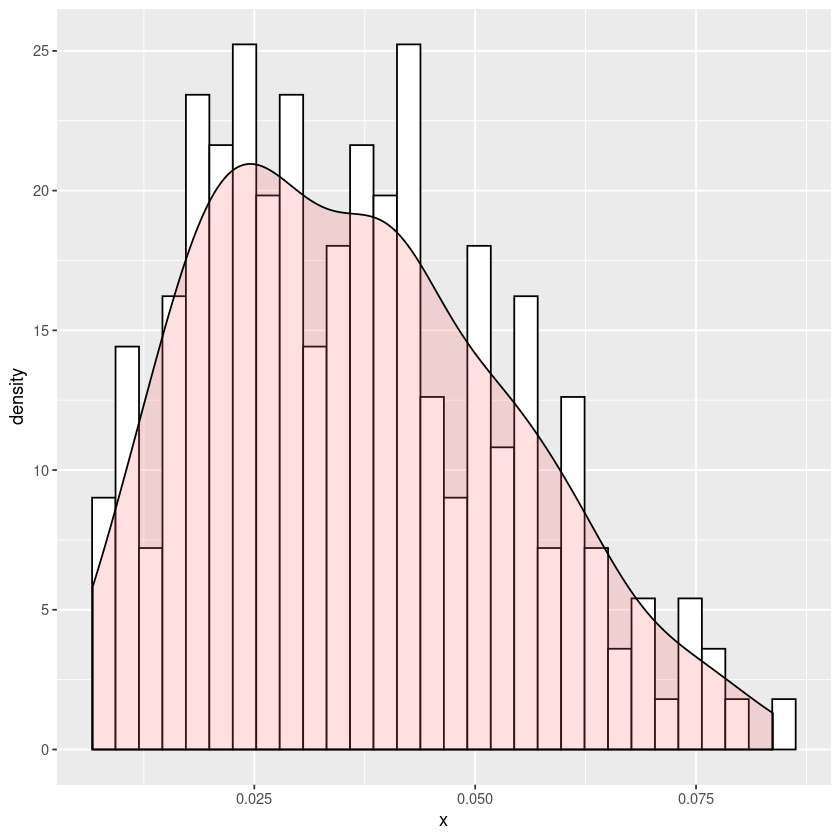

In [40]:
p <- ggplot(df, aes(x = x)) + 
        geom_histogram(aes(y=..density..), colour="black", fill="white")+
        geom_density(alpha=.2, fill="#FF6666") +
        geom_vline(aes(xintercept=mean(x)), color="blue", linetype="dashed", size=1)
p


ggplot(df, aes(x=x)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white")+
 geom_density(alpha=.2, fill="#FF6666")

In [42]:
source("./utilities.R")

In [41]:
mean_res <- helper_mean(df_list_lnc[[1]])

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



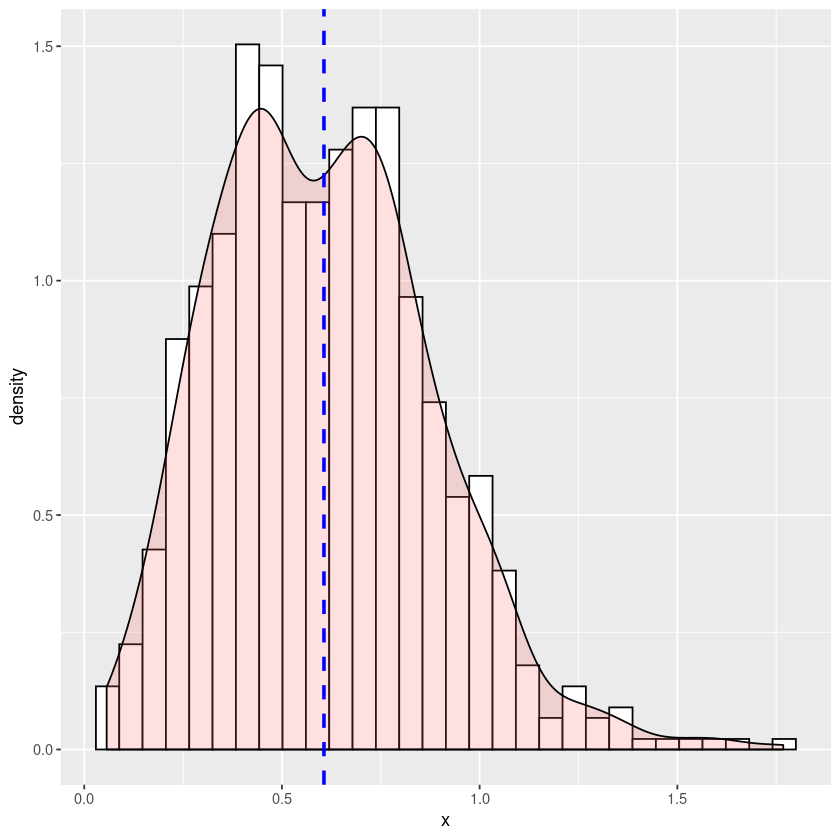

In [43]:
ghist(mean_res)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



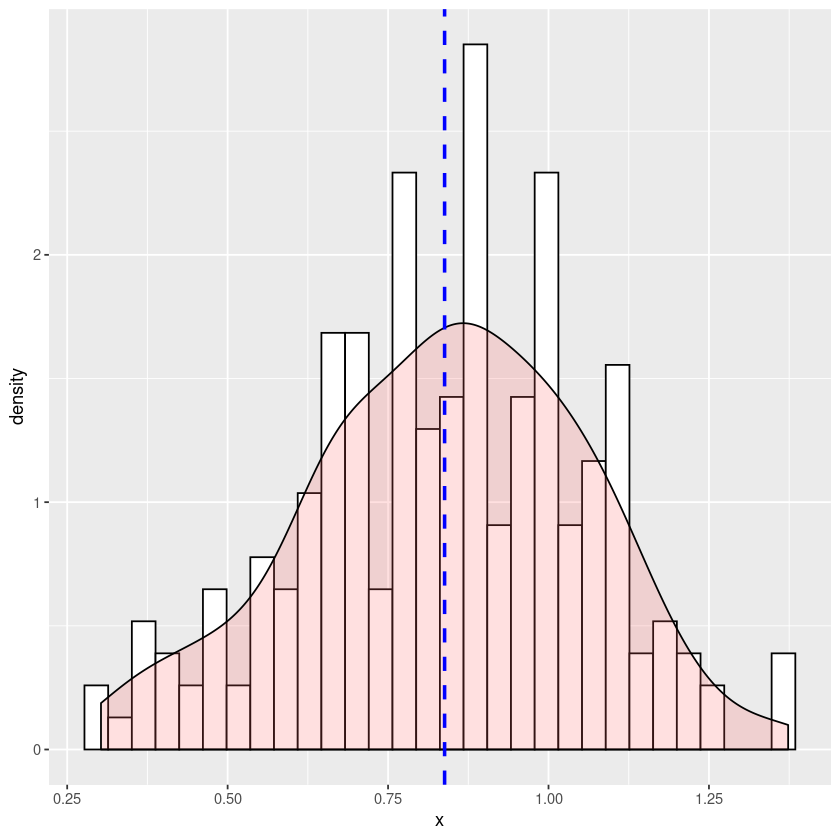

In [44]:
mean_res <- helper_mean(df_list_lnc[[2]])
ghist(mean_res)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



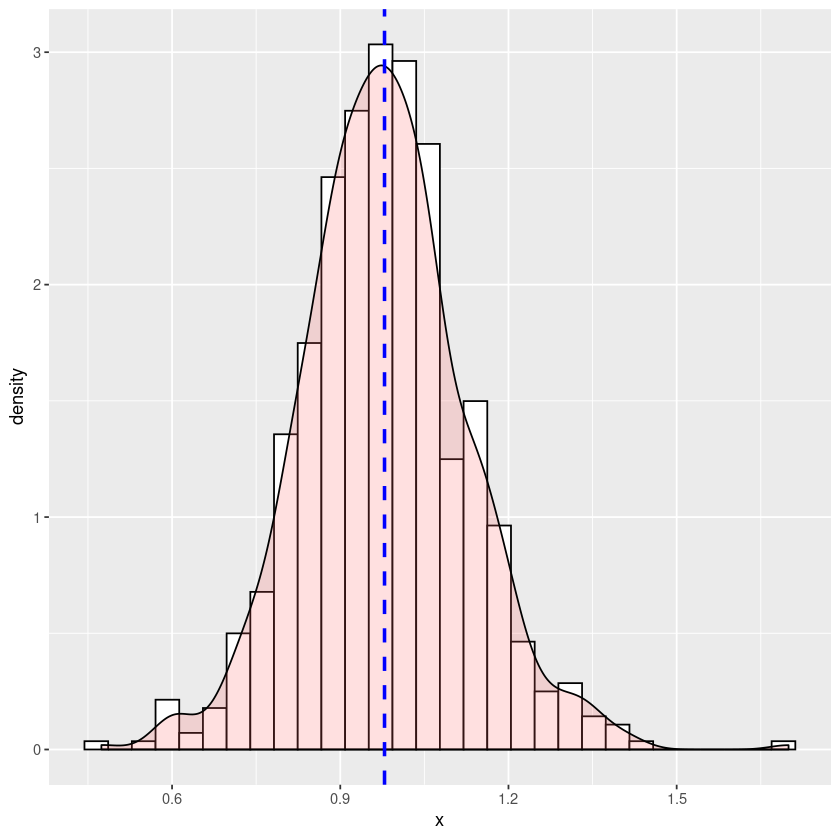

In [46]:
mean_res <- helper_mean(df_list_lnc[[3]])
ghist(mean_res)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



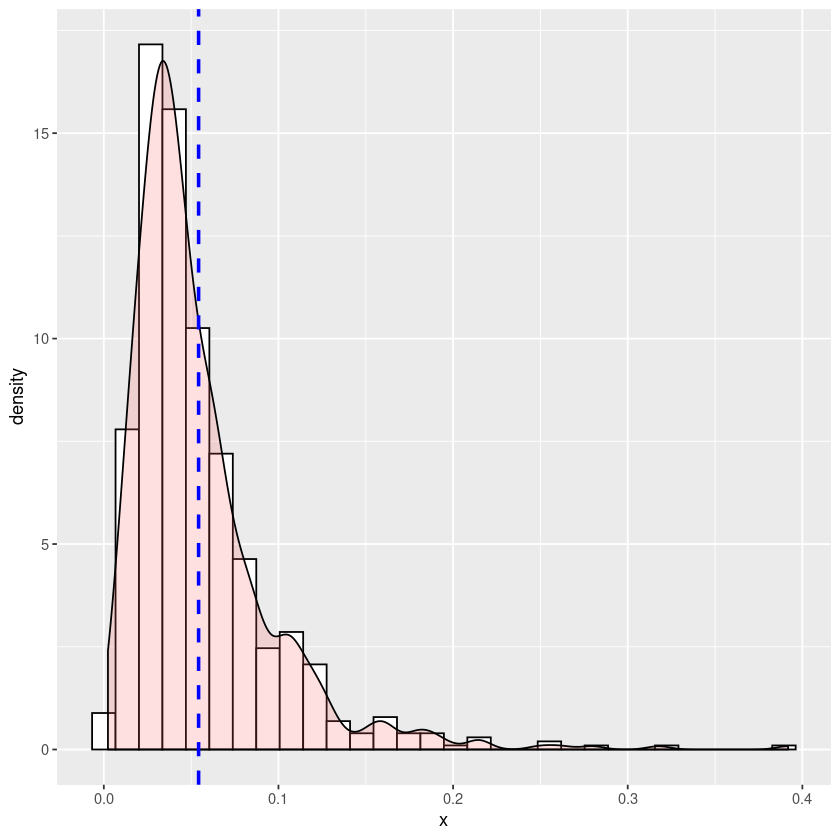

In [48]:
mean_res <- helper_mean(df_list_mirna[[1]])
ghist(mean_res)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



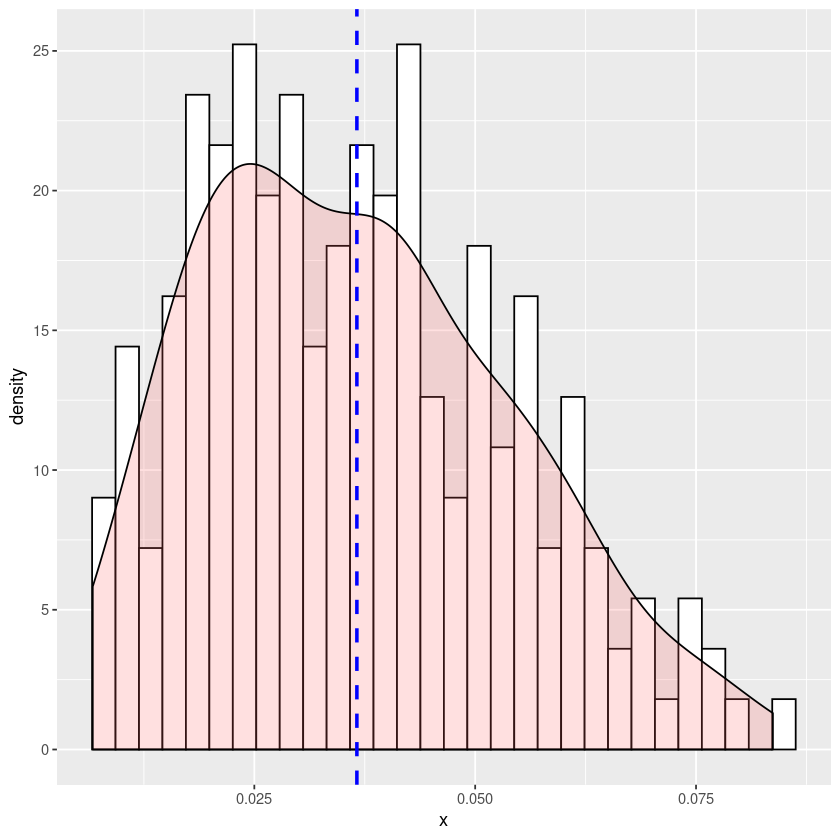

In [49]:
mean_res <- helper_mean(df_list_mirna[[2]])
ghist(mean_res)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



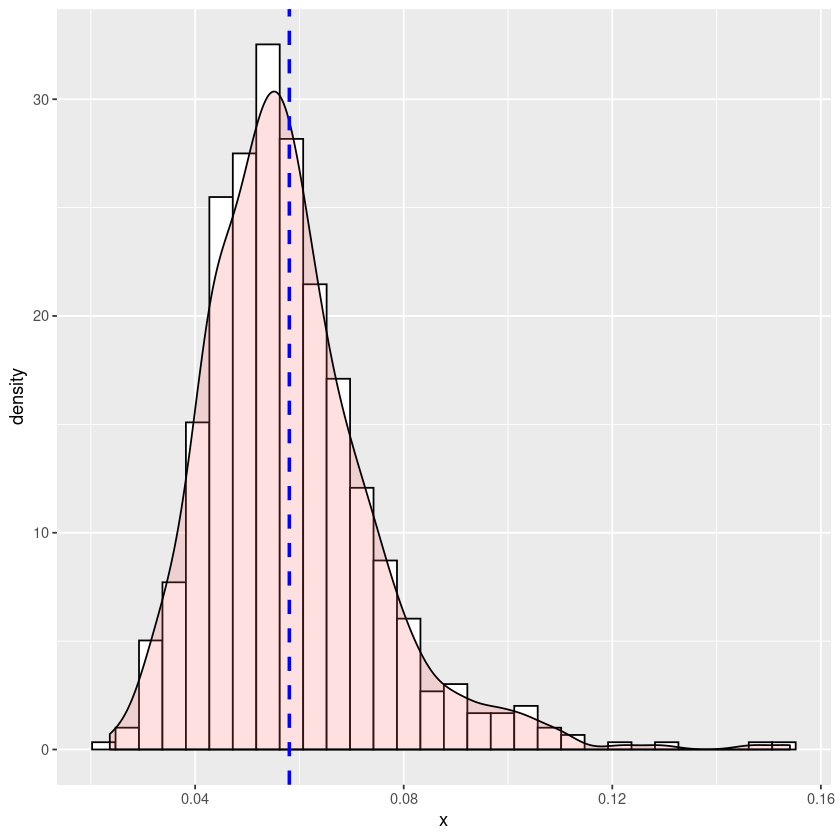

In [51]:
mean_res <- helper_mean(df_list_mirna[[3]])
ghist(mean_res)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



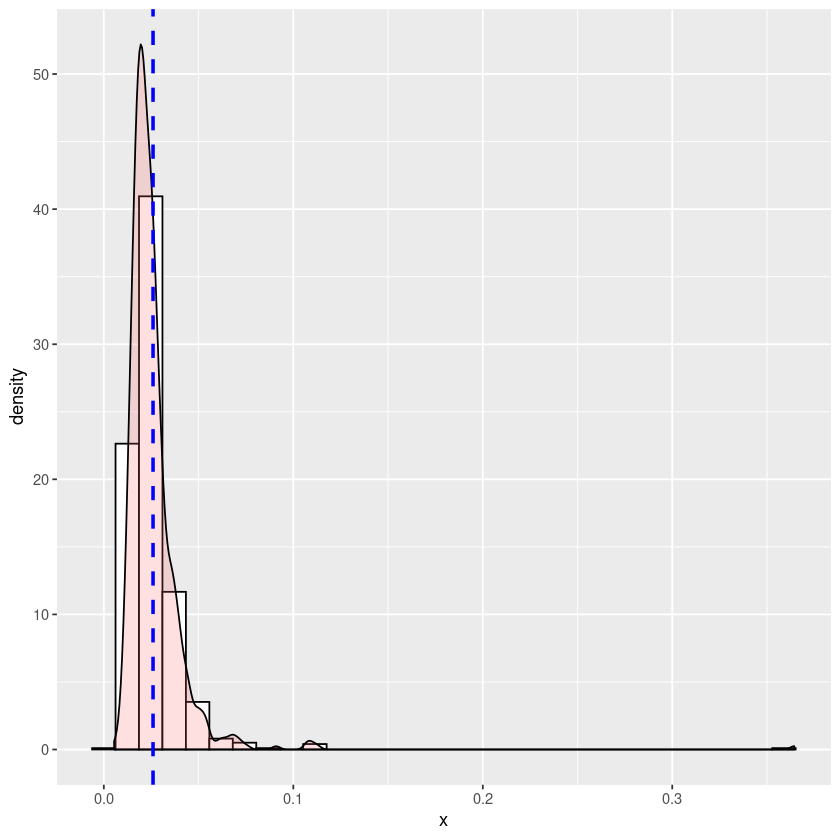

In [52]:
mean_res <- helper_mean(df_list_mirna[[4]])
ghist(mean_res)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



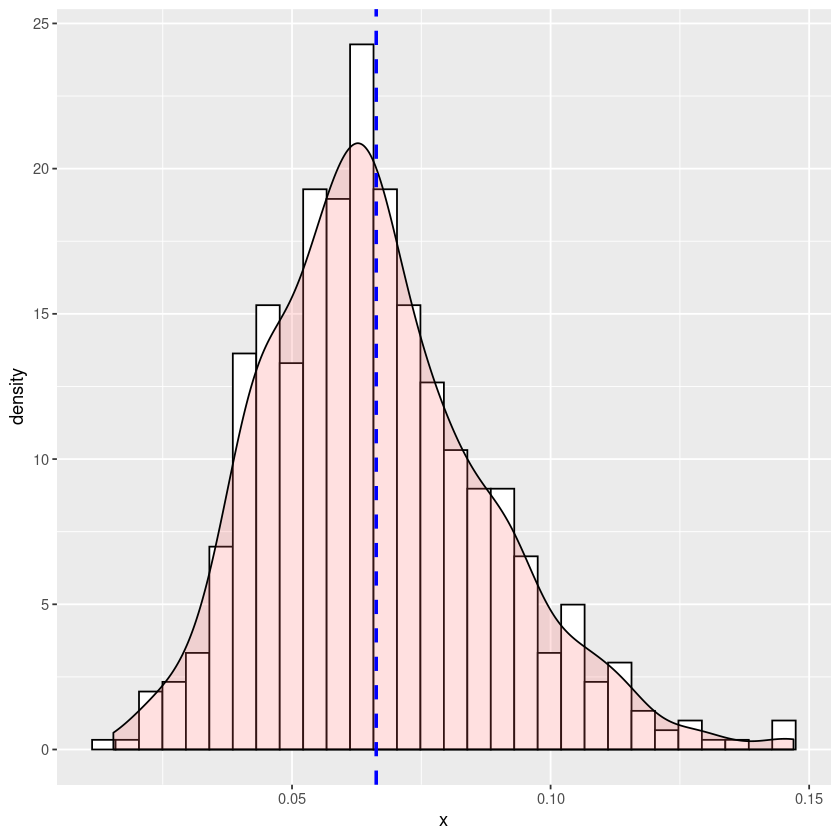

In [53]:
mean_res <- helper_mean(df_list_mirna[[5]])
ghist(mean_res)

In [54]:
library(patchwork)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



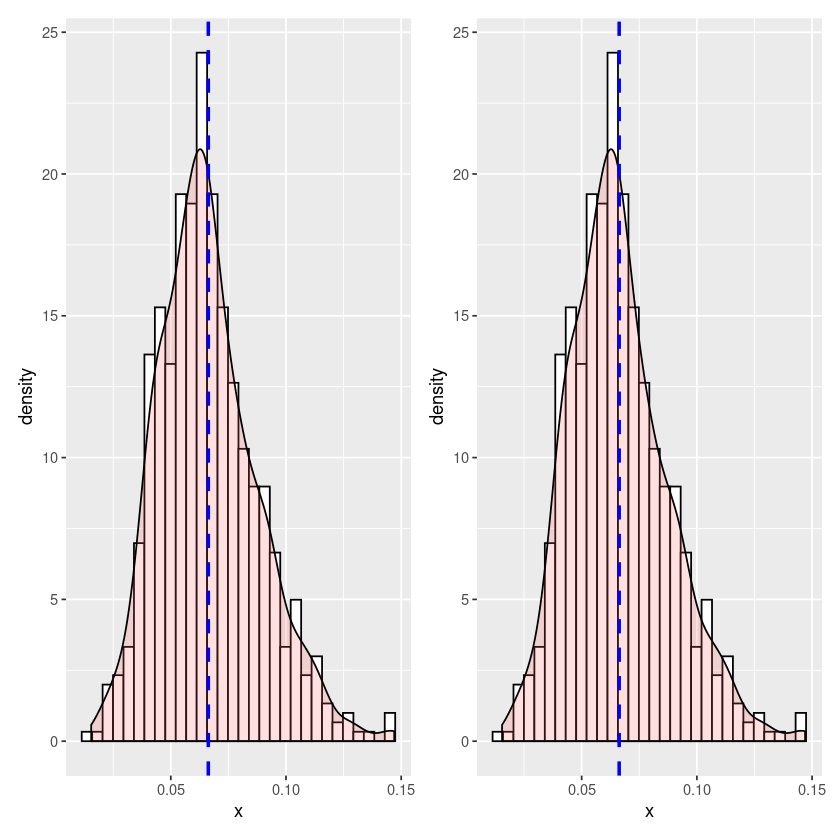

In [55]:
p1 = ghist(helper_mean(df_list_mirna[[1]]))
p2 = ghist(helper_mean(df_list_mirna[[1]]))
p1 + p2

In [ ]:
library(gridExtra)

In [18]:
#df_list_lnc[[1]]
mean_res <- apply(as.numeric(df_list_lnc[[1]][, 3:ncol(df_list_lnc[[1]])]), 1, mean)

ERROR: Error in apply(as.numeric(df_list_lnc[[1]][, 3:ncol(df_list_lnc[[1]])]), : (list) object cannot be coerced to type 'double'
